In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install scipy
!pip install bnlearn
!pip install openpyxl
!pip install doubleml

# !pip install --upgrade scipy numpy pandas scikit-learn bnlearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Импорт библиотек

In [2]:
# Подключим необходимые библиотеки
import bnlearn
# import pgmpy
from sklearn.metrics import confusion_matrix
import networkx as nx
import numpy as np
import pandas as pd
import scipy as scipy
from copy import deepcopy
import math
from scipy.stats import multivariate_normal
import seaborn
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform, expon, logistic
import seaborn as sns
import networkx as nx
import sklearn
import doubleml as dml
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.base import clone
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# 1 Обоснование темы

1. Придумайте непрерывную зависимую (целевую) переменную (например, заработная плата или прибыль) и бинарную переменную воздействия (например, образование или факт занятий спортом).

* В качестве непрерывной зависимой целевой переменной был выбран  **уровень счастья** `happiness` (шкала измерения от 0 до 100)

* В качестве бинарной переменной воздействия был выбран  **факт прослушивания музыки по пути на работу** `music`, где 1 - слушает музыку по пути на работу, 0 - не слушает музыку по пути на работу

  2. Опишите, для чего может быть полезно изучение влияния переменной воздействия на зависимую переменную. В частности, укажите, как эта информация
  может быть использована бизнесом или государственными органами.

  Прослушивание музыки снижает уровень тревоги и стресса (это доказывается во многих исследованиях, например, [Music interventions for posttraumatic stress disorder: A systematic review](https://www.sciencedirect.com/science/article/pii/S2950004424000075), а значит работодатели могут рекомендовать своим сотрудникам слушать музыку по пути на работу для улучшения общего эмоционального состояния и, следовательно, увеличения продуктивности во время рабчего дня. Транспортные компании могут интегрировать персонализированные музыкальные настройки в свои приложения, что позволит улучшить клиентский опыт и удовлетворенность поездкой. Так, например, в 2014 году Uber сделал коллаборацию со Spotify, включив в приложение функцию подбора музыкальных треков во время поездки.
  Государственные органы могут интегрировать музыкальное сопровождение в транспорт для снижения уровня стресса, что может оказать благоприятное влияние на ментальное здоровье граждан. Более того, можно создавать специальные музыкальные зоны в парках или на остановках, чтобы повысить удовлетворенность граждан городской инфраструктурой, а следовательно, и их уровень счастья.

3. Обоснуйте наличие причинно-следственной связи между зависимой переменной и переменной воздействия. Приведите не менее 2-х источников из научной
литературы, подкрепляющих ваши предположения.

* Как уже описывали выше, прослушивание музыки в целом снижает уровень страесса и тревоги, а соответственно повышает уровень благополучия (счастья), об этом подробно описано в исследовании [**Liu, G., Hu, J., & Kostikova, I. (2025). Music therapy and its impact on anxiety and mental well-being of Chinese students: An experimental comparison of traditional and VR approaches. Acta Psychologica, 255, 104898**](https://www.sciencedirect.com/science/article/pii/S0001691825002112), опубликованном в журнале **Acta Psychologica**. Результаты говорят, что музыкальная терапия в любом формате повышает уровень счастья.

* Также китайские ученые проводили исследование о роли музыки в жизни студентов - [**Hu, X., Chen, J., & Wang, Y. (2021). University students’ use of music for learning and well-being: A qualitative study and design implications. Information Processing & Management, 58(1), 102409**](https://www.sciencedirect.com/science/article/pii/S0306457320309043), журнал **Information Processing & Management**, его результаты также демонстрируют связь между прослушиванием музыки и счастьем: во-первых, 50% респондентов слушают музыку при ходьбе (по пути куда-либо), 38% - в транспорте, что показывает значимость нашей переменной воздействия. Во-вторых, 85% из них испытывают позитивные эмоции после прослушивания музыки, эффективность учебы и общее физическое благополучие повышаются.

Таким образом, можно сделать вывод, что действительно, музыка в целом улучшает благосостояние индивидов, а также ее достаточно часто слушают по пути куда-либо.

4. Кратко опишите результаты предшествовавших исследований по схожей тематике и критически оцените методологию этих работ с точки зрения гибкости
(жесткости предпосылок) использовавшихся методов эконометрического анализа. Объясните, в чем заключается преимущество и недостатки применяемых
вами методов в сравнении с теми, что ранее использовались в литературе.

* Оба исследования проводились на очень ограниченной выборке, из-за чего результаты требуют дальнейших подтверждений, но тем не менее имеют большой потенциал.
* Цель первого исследования - *Сравнить эффективность традиционной музыкотерапии и музыкотерапии с VR для снижения тревожности и улучшения психологического благополучия у китайских студентов*. В контексте нашего исследования значимым является факт того, что в целом любая музыка оказывает позитивное влияние на благополучие индивидов.  В качестве инструментов использовались шкала благополучия и шкала тревожности, а для анализа - t-тесты, ANOVA, пост-хок тест Тьюки. Эти тесты достаточно требовательны к структуре данных, не выявляют взаимодействие переменных и достаточно чувствительны к выбросам.
* Цель второго исследования - *Изучить, как китайские студенты используют музыку для поддержки обучения и психологического благополучия, и вывести рекомендации для разработки музыкальных онлайн-сервисов*. Результаты исследования были описаны в п. 3, и они коррелируют с нашим ииследованием, однако, китайские исследователи применяли анкетирование в качестве инструмента и на основе него делали выводы. Такой подход может быть менее точным, из-за сильного влияния человеческого фактора при ответе на вопросы.
* Методы машинного обучения позволяют работать с большими объемами данных, выявлять более сложные взаимосвзяи, в то время как t-тесты, ANOVA и анкетирование ограничены в этом, однако возникает риск переобучения. Также необходимо отметить, что все эти подходы используются для разных целей и скорее являются взаимодолняющими.

5. Придумайте хотя бы 3 контрольные переменные, по крайней мере одна из которых должна быть бинарной и хотя бы одна – непрерывной. Кратко обоснуйте
выбор каждой из них.

**Контрольные переменные:**

$\text{Wage}$ - Уровень зарплаты, тыс. руб. (непрерывная переменная), зарплата может влиять на уровень счастья, потому что чем выше заработная плата, тем больше материальных и нематериальных благ человек может себе позволить, тем самым удовлетворив свои потребности.

$\text{Fam}$ - Время, проведенное с семьей в неделю (непрерывная, цензурированная переременная), может оказывать положительное влияние на уровень счастья, потому что времяпровождение с семьей помогает человеку справляться со стрессом, приносит положительные эмоции, семья служит поддержкой в трудных ситуациях. Также данную переменную мы ограничили сверху 72 часами, учитывая, что человек тратит в среднем 8 часов в сутки на сон и 40 часов в неделю на работу.

$\text{Hobby}$ - Наличие хобби (бирная переменная), также оказывает положительное воздействие на уровень счастья, так как приносит положительные эмоции, позволяет самореализоваться, чувствовать принадлежность к определенной социальной группе.

6. Придумайте бинарную инструментальную переменную и обоснуйте, почему
она удовлетворяет необходимым условиям.

$\text{Subs}$ - Наличие подписки на музыкальный сервис (бинарная переменная), сейчас во многих странах доступ к музыке достаточно сильно ограничен, следовательно, для комфортного прослушивания люди приобретают подписки на музыкальные сервисы, иначе прослушивание музыки становится достаточно трудным (где-то невозможным). Именно поэтому мы уверены в наличии взаимосвязи между наличием подписки и прослушиванием музыки.

# 2 Генерация и предварительная обработка данных

1. Опишите математически предполагаемый вами процесс генерации данных.

2. Обоснуйте предполагаемые направления связей зависимой переменной и переменной воздействия с контрольными переменными.


3. Симулируйте данные в соответствии с предполагаемым вами процессом и приведите корреляционную матрицу, а также таблицу со следующими описательными статистиками:

• Для непрерывных переменных: выборочное среднее, выборочное стандартное отклонение, медиана, минимум и максимум.

• Для бинарных переменных: доля и количество единиц

Ненаблюдаемая переменная:
$\text{Health}$ - Уровень здоровья

In [3]:
# Число наблюдений
n = 10000

### Сгенерируем контрольные переменные

In [4]:
np.random.seed(200)
# Зарплата
# Предположим, что распределение зарплаты схоже с нормальным распределением
wage = scipy.stats.norm.rvs(size = n, loc = 100, scale = 30)
wage[wage <= 0] = 0
wage = np.round(wage, 2)
print({'wage': wage[0:10]})

# Время с семьей
# Делаем аналогичное предположение
fam = scipy.stats.norm.rvs(size = n, loc = 36, scale = 10)
fam[fam >= 72] = 72
fam[fam <= 0] = 0
fam = np.round(fam, 1)
print({'fam': fam[0:10]})

# Хобби
# Предположение о принадлежности к распределению Бернули (p = 0.4)
hobby = np.random.binomial(n = 1, p = 0.4, size = n)
print({'hobby': hobby[0:10]})
# Доля индивидов c наличием хобби
print(np.mean(hobby))

{'wage': array([ 56.47, 157.33, 121.36,  92.57, 110.84,  99.01,  93.36, 114.32,
        79.24, 123.76])}
{'fam': array([56.4, 32.2, 37.2, 50.6, 45.2, 15.2, 42.6, 37.2, 40.3, 32.2])}
{'hobby': array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0])}
0.4012


Text(0.5, 1.0, 'Fam')

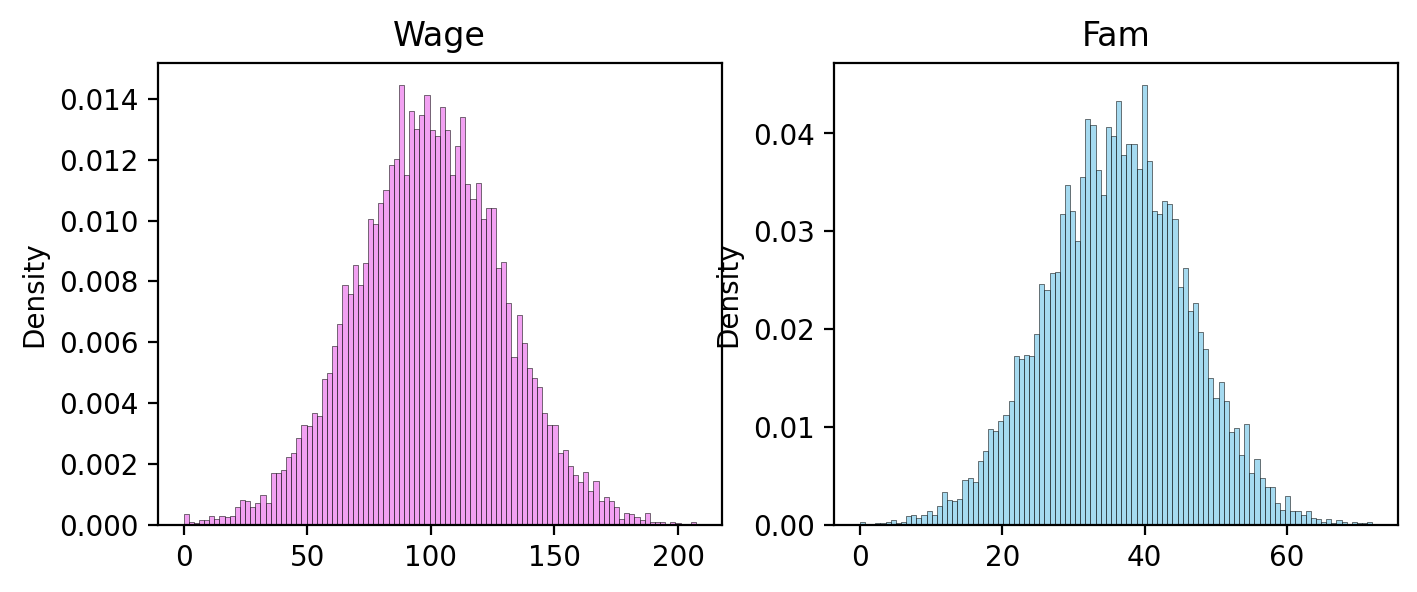

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=200)

# Гистограмма для wage
sns.histplot(wage, ax=axes[0], stat='density', color="violet", label = "histogram", bins=100)
axes[0].set_title("Wage")

# Гистограмма для fam
sns.histplot(fam, ax=axes[1], stat='density', color="skyblue", label = "histogram", bins=100)
axes[1].set_title("Fam")

### Сгенерируем ненаблюдаемую переменную, пораждающую эндогенность (уровень здоровья)

- **Уровень здоровья** (`health`, непрерывная переменная): Уровень здоровья оказывает влияние на уровень счастья, (найти статистику, подтверждение) + надо связать с переменной воздействия (как здоровье связано с прослушиванием музыки)????
Уровень здоровья измеряем по шкале от 1 до 10, может подойти Пуассоновское распределение

In [6]:
# Здоровье
np.random.seed(111)
health = poisson.rvs(size = n, mu = 5)
health[health >= 10] = 10
print(health[0:10])

[5 2 3 4 9 5 6 5 7 1]


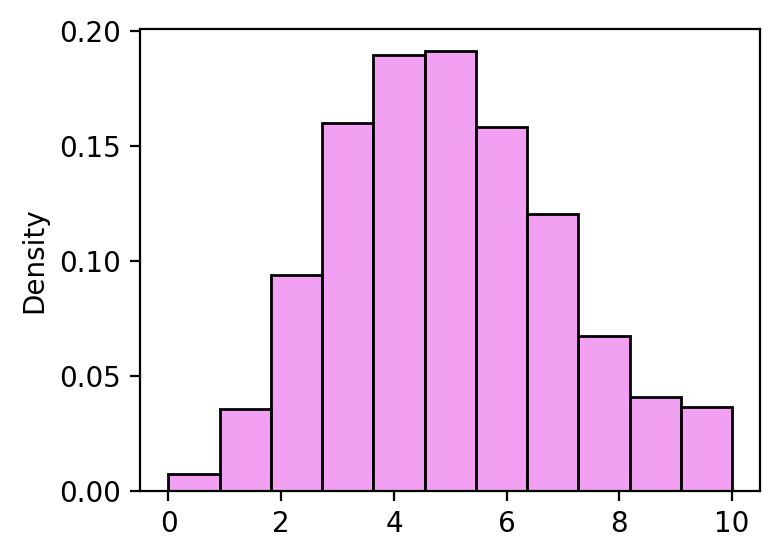

In [7]:
# Посмотрим на распределение
plt.figure(figsize=(4, 3), dpi=200)
sns.histplot(health,                 # данные
                 stat = 'density',           # тип гистограммы
                 color = "violet",        # цвет гистограммы
                 label = "histogram",        # наименование гистограммы
                 bins=np.unique(health).shape[0]);                 # число столбиков в Гистограмме

### Сгенерируем инструментальную переменную

Наличие подписки на музыкальный сервис $\text{Subs}_{i}$. Обратим внимание, что поскольку $\text{Subs}_{i}$ является бинарной переменной, то имеет распределение Бернулли, а значит условное математическое ожидание и условная вероятность совпадают.
Рассмотрим следующую спецификацию:

$\mathrm{P}(\text{Subs}_i = 1 \mid \text{Wage}_i, \text{Hobby}_i) = \Phi\left( 0.02 * \text{Wage}_i + 0.3 * \ln\left(0.5 * \text{Hobby}_i + 1 \right) + 0.5 * \text{Hobby}_i - 3 \right)$

Где $\Phi()$ - функция распределения стандартного нормального распределения.

In [8]:
subs_index = 0.02*wage + 0.3*np.log(0.5*hobby + 1) + 0.5*hobby - 3
print(np.var(subs_index)) # Проверим дисперсию индекса – она не должна отличаться от дисперсии стандартного нормального распределения больше, чем в 2 раза

0.4510232088786546


In [9]:
#инструментальные
# Условная вероятность наличия подписки на музыкальный сервис
subs_prob = norm.cdf(subs_index)

# Посмотрим на несколько первых условных вероятностей
print(subs_prob[0:10])

# Факт наличия подписки на музыкальный сервис
subs = np.random.binomial(n = 1, p = subs_prob, size = n)

# Первые несколько значений условных вероятностей и переменной
print(pd.DataFrame({'P(subs = 1|X)': np.round(subs_prob[0:10], 2),
                    'subs': subs[0:10]}))

# Доля индивидов, у которых есть подписка на музыкальный сервис
print(pd.DataFrame(data    =  np.mean(subs),
                   index   = ['P(subs = 1)'],
                   columns = ['Оценка']))

[0.03070027 0.55827612 0.51947641 0.12536048 0.435826   0.15391166
 0.30461935 0.23773728 0.07850493 0.29986112]
   P(subs = 1|X)  subs
0           0.03     0
1           0.56     0
2           0.52     1
3           0.13     0
4           0.44     0
5           0.15     0
6           0.30     0
7           0.24     0
8           0.08     0
9           0.30     1
             Оценка
P(subs = 1)  0.2632


### Сгенерируем переменную воздействия

Симулируем переменную воздействия: факт прослушивания музыки по пути на работу $\text{Music}_{i}$.

Предположим, что условные вероятности переменной воздействия зависят от контрольных переменных, инструментальной переменной и ненаблюдаемой переменной. Для краткости обозначим  $\tilde{X}_{i} = (\text{Wage}_{i}, \text{Fam}_{i}, \text{Hobby}_{i}, \text{Health}_{i}, \text{Subs}_{i})$.

$\mathrm{P}(\text{Music}_i = 1 \mid \tilde{X}_i) = F_{\text{Logistic}}\left(0.02 *\ln(\text{Fam}_i + 1) + 2.5 * \sqrt{\text{Health}_i} + 20 * \text{Subs}_i - 4.5 \right)$

Где $F_{\text{Logistic}}$ - функция распределения стандартного логистического распределения. Для краткости введем обозначение для условной вероятности прослушивания музыки по пути на работу у индивида при конкретном значении факта наличия подписки на музыкальный сервис:

$$p_{k}^{\text{Subs}_i} = P(\text{Subs}_i = 1|\text{Wage}_i, \text{Fam}_i, \text{Hobby}_i, \text{Health}_i, \text{Music}_i = k)\text{, где }k\in\{0,1\}$$

Для того, чтобы впоследствии анализировать локальные средние эффекты воздействия $\text{LATE}$, необходимо различать величину переменной воздействия $\text{Music}_{i}$ в зависимости от значения инструмента $\text{Subs}_{i}$. Для этого рассмотрим ни от чего не зависящую равномерную случайную величину $U_{i}\sim U(0,1)$ и введем гипотетические переменные:

$$\text{Music}_{1i} = I(p_{1}^{\text{Subs}_{i}}\geq U_{i})$$
$$\text{Music}_{0i} = I(p_{0}^{\text{Subs}_{i}}\geq U_{i})$$

$$I(\text{условие}) = \begin{cases}1\text{, если условие выполнено}\\0\text{, в противном случае}\end{cases}$$

Переменные $\text{Music}_{1i}$ и $\text{Music}_{0i}$ отражают потенциальный факт прослушивания музыки по пути на работу в зависимости от наличия подписки на музыкальный сервис.

In [10]:
# Равномерные случайные величины
u = uniform.rvs(size = n)

# Сгенерируем часть индекса, не зависящую от наличия подписки на музыкальный сервис
index = 0.02*np.log(fam + 1) + 2.5*np.sqrt(health) - 4.5

In [11]:
# Симулируем факт прослушивания музыки индивидам по пути на работу в случае,
# когда у него есть подписка на музыкальный сервис
subs1 = 1
music1_index = index + 20*subs1
music1_prob  = logistic.cdf(music1_index)
music1 = (music1_prob >= u).astype(int)

# Доля людей, слушающих музыку по пути на работу в случае, когда у всех есть
# подписка на музыкальный сервис
np.mean(music1)

1.0

In [12]:
# Симулируем факт прослушивания музыки индивидам по пути на работу в случае,
# когда у них нет подписки на музыкальный сервис
subs0 = 0
music0_index = index + 20*subs0
music0_prob  = logistic.cdf(music0_index)
music0 = (music0_prob >= u).astype(int)

# Доля людей, слушающих музыку по пути на работу, когда у всех нет
# подписки на музыкальный сервис
np.mean(music0)

0.6877

Таким образом, индивидов можно разделить на $4$ группы:


*   **Always takers** - те, у кого $\text{music}_{0i}=\text{music}_{1i}=1$: слушают музыку по пути на работу независимо от наличия подписки на музыкальный сервис.
*   **Never takers**- те, у кого $\text{music}_{0i}=\text{music}_{1i}=0$: не слушают музыку по пути на работу независимо от наличия подписки на музыкальный сервис.
*   **Compliers** - те, у кого $\text{music}_{1i}=1$ и $\text{music}_{0i}=0$, то есть $\text{music}_{1i} > \text{music}_{0i}$: слушают музыку по пути на работу только, если есть подписка на музыкальный сервис.
*   **Deniers** - те, у кого $\text{music}_{1i}=0$ и $\text{music}_{0i}=1$, то есть $\text{music}_{1i} < \text{music}_{0i}$: слушают музыку по пути на работу только, если подписка на музыкальный сервис отсутствует.

Для соблюдения предпосылок используемых методов важно отсутствие Deniers, что гарантируется используемым процессом генерации данных

In [13]:
# Рассмотрим различные группы индивидов
ind_type = np.empty(n, dtype = 'U25')
ind_type[(music1 == 1) & (music0 == 1)] = 'Always takers'
ind_type[(music1 == 0) & (music0 == 0)] = 'Never takers'
ind_type[music1 > music0]               = 'Compliers'
ind_type[music1 < music0]               = 'Denier'

# Посмотрим на распределение индивидов разного типа
print(pd.value_counts(ind_type))

Always takers    6877
Compliers        3123
Name: count, dtype: int64


In [14]:
# Факт прослушивания музыки по пути на работу
music = music1 * subs + music0 * (1 - subs)

# Доля индивидов, слушающих музыку по пути на работу
print(np.mean(music))

0.7699


Также необходимо проверить, чтобы коэффициенты корреляции между переменной воздействия (Music) и инструментальной переменной (Subs), а также ненаблюдаемой переменной (Health), порождающей эндогенность  лежаиа в промежутке 0,2 и 0,8,чтобы  инструмент бы валидным и можно было скорректировать эндогенность

In [15]:
print(np.round(np.corrcoef([music, subs, health, wage, fam, hobby]), 2))

[[ 1.    0.33  0.37  0.11 -0.    0.05]
 [ 0.33  1.    0.02  0.37 -0.    0.21]
 [ 0.37  0.02  1.    0.   -0.03 -0.01]
 [ 0.11  0.37  0.    1.    0.02  0.01]
 [-0.   -0.   -0.03  0.02  1.   -0.01]
 [ 0.05  0.21 -0.01  0.01 -0.01  1.  ]]


### Сгенерируем целевую переменную (уровень счастья)

**Основная идея**
* Предположим, что счастье имеет положительную зависимость от здоровья, и при этом, когда человек уже очень здоров,  увеличение уровня здоровья на единицу влияет на уровень счастья меньше
* Уровень зарплаты и время, проведенное с семьей положительно влияют на уровень счастья


Уравнение уровня счастья при отсутствии факта прослушивания музыки по пути на работу:

$$\text{Happiness}_{0i} = \underbrace{ \underbrace{7.8 * \sqrt{\text{Health}_i}}_{g_{0}^{\text{unobs}}} + \underbrace{\frac{\text{Wage}_i}{6 + 0.2 *\text{Fam}_i + 0.3 * \text{Hobby}_i}+ 0.7 * \text{Fam}_i + \text{Hobby}_i}_{g_{0}^{\text{obs}}}}_{g_0} + \varepsilon_{0i}, \quad \text{где } \varepsilon_{0i} \sim (\text{EXP}(1/5) - 5)$$


Уравнение уровня счастья при наличии факта прослушивания музыки по пути на работу:

$$\text{Happiness}_{1i} = \underbrace{ \underbrace{8.2 * \sqrt{\text{Health}_i}}_{g_{1}^{\text{unobs}}} + \underbrace{\frac{\text{Wage}_i}{4 + 0.3 *\text{Fam}_i + 0.4 * \text{Hobby}_i}+ 0.7 * \text{Fam}_i+\text{Hobby}_i}_{g_{1}^{\text{obs}}}}_{g_1} + \varepsilon_{1i}, \quad \text{где } \varepsilon_{1i} \sim \text{N}(0,7)$$

Наблюдаемый уровень счастья:

$$\text{Happiness}_{i} = \begin{cases}\text{Happiness}_{1i}\text{, если }\text{Music}_{i}=1\\ \text{Happiness}_{0i}\text{, если }\text{Music}_{i}=0\end{cases} = \\ =\text{Happiness}_{1i}\times\text{Music}_{i} + \text{Happiness}_{0i}\times\left(1-\text{Music}_{i}\right)$$

In [16]:
# Случайные ошибки
error0 = expon.rvs(size = n, scale = 5) - 5
error1 = norm.rvs(size= n, loc=0, scale=7)

# Функция от контрольных переменных
  # когда индивид не слушает музыку по пути на работу
g0_obs   = wage / (6 + 0.2*fam + 0.3*hobby) + 0.7*fam + hobby
g0_unobs =  7.8 * np.sqrt(health)
g0 = g0_obs + g0_unobs
  # когда индивид слушает музыку по пути на работу
g1_obs   = wage / (4 + 0.3*fam + 0.4*hobby) + 0.7*fam + hobby
g1_unobs =  8.2 * np.sqrt(health)
g1 = g1_obs + g1_unobs

# уровень счастья и в зависимости от факта факта прослушивания музыки по пути на работу
happiness0 = g0 + error0
happiness1 = g1 + error1

# Наблюдаемый уровень счастья
happiness = happiness1 * music + happiness0 * (1 - music)

Во избежание чрезвычайно точных или крайне неточных оценок, желательно, чтобы при каждом $j\in\{0, 1\}$ дисперсии $\varepsilon_{ji}$, $g_{j}$, $g_{j}^{\text{obs}}$ и  $g_{j}^{\text{unobs}}$ различались не более, чем в $5$ раз.

In [17]:
# Приблизительно оценим адекватность дисперсий
print(pd.DataFrame(data    = [np.var(error0),   np.var(g0),
                              np.var(g0_obs),   np.var(g0_unobs),
                              np.var(error1),   np.var(g1),
                              np.var(g1_obs),   np.var(g1_unobs)],
                   index   = ['Var(eps0)',     'Var(g0)',
                              'Var(g0_obs)',   'Var(g0_unobs)',
                              'Var(eps1)',     'Var(g1)',
                              'Var(g1_obs)',   'Var(g1_unobs)'],
                   columns = ['Оценка']))

                  Оценка
Var(eps0)      24.859588
Var(g0)        54.861142
Var(g0_obs)    39.169029
Var(g0_unobs)  16.925023
Var(eps1)      48.927053
Var(g1)        52.245172
Var(g1_obs)    34.836517
Var(g1_unobs)  18.705433


Как мы видим, дисперсии адекватны. Далее введем округление и посмотрим на первые несколько значений

In [18]:
happiness[happiness <= 0]  = 0
happiness = happiness/np.max(happiness)
# Также, для удобства введем округление
happiness = np.round(happiness, 2) * 100

# Посмотрим на несколько первых значений
print(happiness[0:10])

[71. 55. 62. 59. 72. 41. 70. 69. 59. 40.]


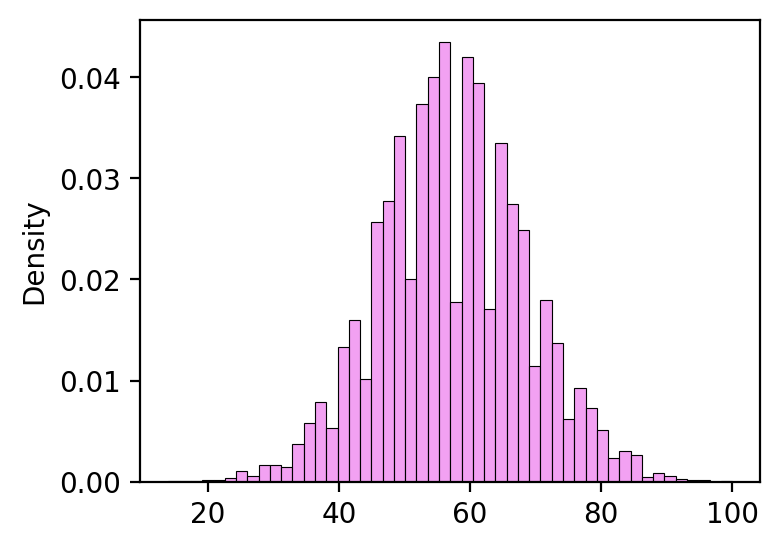

In [19]:
# Посмотрим на распределение уровня счастья
plt.figure(figsize=(4,3), dpi=200)
sns.histplot(happiness,                  # данные
                 stat  = 'density',          # тип гистограммы
                 color = "violet",    # цвет гистограммы
                 label = "histogram",        # наименование гистограммы
                 bins  = 50);                 # число столбиков в Гистограмме

In [20]:
df = pd.DataFrame()
df['Happiness'] = happiness
df['Music'] = music
df['Subs'] = subs
df['Wage'] = wage
df['Hobby'] = hobby
df['Fam'] = fam
df['Health'] = health
df

,Happiness,Music,Subs,Wage,Hobby,Fam,Health
0,71.0,1,0,56.47,0,56.4,5
1,55.0,0,0,157.33,0,32.2,2
2,62.0,1,1,121.36,1,37.2,3
3,59.0,0,0,92.57,0,50.6,4
4,72.0,1,0,110.84,1,45.2,9
...,...,...,...,...,...,...,...
9995,46.0,1,0,67.78,0,37.4,3
9996,77.0,1,0,122.23,0,25.7,8
9997,62.0,1,1,157.04,1,36.7,4
9998,51.0,1,0,53.53,1,28.0,6


### Описательные статистики и корреляционная матрица

• Для непрерывных переменных: выборочное среднее, выборочное стандартное отклонение, медиана, минимум и максимум.

• Для бинарных переменных: доля и количество единиц.

In [21]:
print("Описательные статистики для непрерывных переменных:\n")
print(round(df[['Happiness', 'Wage', 'Fam', 'Health']].describe(), 2))
print("\nОписательные статистики для бинарных переменных:\n")
data = pd.DataFrame({'Количество единиц': df[['Music', 'Subs', 'Hobby']].sum(),
                     'Доля единиц': df[['Music', 'Subs', 'Hobby']].sum()/df.shape[0]})
print(data)

Описательные статистики для непрерывных переменных:

       Happiness      Wage       Fam    Health
count   10000.00  10000.00  10000.00  10000.00
mean       57.40     99.53     36.04      4.98
std        11.16     29.71      9.92      2.18
min        14.00      0.00      0.00      0.00
25%        50.00     79.73     29.30      3.00
50%        57.00     99.40     36.10      5.00
75%        65.00    119.76     42.80      6.00
max       100.00    207.28     72.00     10.00

Описательные статистики для бинарных переменных:

       Количество единиц  Доля единиц
Music               7699       0.7699
Subs                2632       0.2632
Hobby               4012       0.4012


Доля единиц соответсвует требованиям (от 0.1 до 0.9), среди отсальных дескриптивных статистик аномалий не обнаружено.

Далее построим корреляционную матрицу:

In [22]:
round(df.corr(), 3)

,Happiness,Music,Subs,Wage,Hobby,Fam,Health
Happiness,1.000,0.192,0.094,0.233,0.045,0.553,0.408
Music,0.192,1.000,0.327,0.110,0.054,-0.003,0.372
Subs,0.094,0.327,1.000,0.370,0.205,-0.000,0.019
Wage,0.233,0.110,0.370,1.000,0.014,0.023,0.003
Hobby,0.045,0.054,0.205,0.014,1.000,-0.011,-0.011
Fam,0.553,-0.003,-0.000,0.023,-0.011,1.000,-0.027
Health,0.408,0.372,0.019,0.003,-0.011,-0.027,1.000


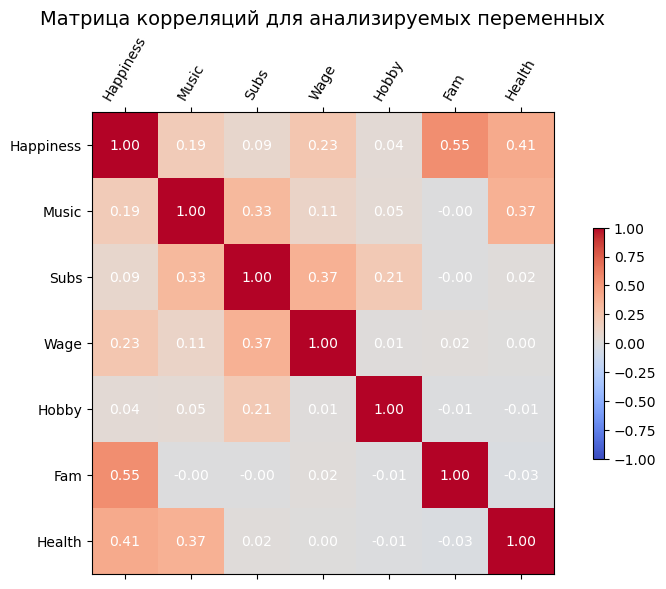

In [23]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 6))
cmap = plt.cm.get_cmap('coolwarm')
im = ax.matshow(corr, cmap=cmap, vmax=1, vmin=-1)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", color="w", fontsize=10)

plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=60)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title('Матрица корреляций для анализируемых переменных', fontsize=14)
plt.colorbar(im, shrink=0.5)
plt.show()

4. Разделите выборку на обучающую и тестовую. Тестовая выборка должна включать от 20% до 30% наблюдений.

In [24]:
features = df.drop(columns='Happiness')
target = df['Happiness']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.2, random_state = 777)

# 3 Классификация

В каждом из заданий, если не сказано иного, необходимо использовать **хотя бы** 3 (на ваш выбор) из следующих методов: наивный Байесовский классификатор, метод ближайших соседей, случайный лес, градиентный бустинг и логистическая регрессия.

1. Отберите признаки, которые могут быть полезны при прогнозировании переменной воздействия и кратко обоснуйте выбор каждой из них. Не включайте в число этих признаков целевую переменную.

Мы предполагаем, что на прослушивание музыки по пути на работу оказывает влияние наличие подписки на музыкальный сервис, также уровень зарплаты (т.к. в зависимости от уровня зарплаты индивид может или не может позволить себе подписку на музыкальный сервис или наушники, чтобы слушать музыку по пути на работу), наличие хобби (хобби может быть связано с музыкой) и время, проведенное с семьей (возможно, человек, проводящий много времени с семьей, хочет уединиться со своими мыслями по пути на работу и послушать музыку), но проверим наше предположение, используя графики важности признаков

In [25]:
regressors_train = features_train.drop(columns='Music')
regressors_test = features_test.drop(columns='Music')
regressors_train.head(3)

,Subs,Wage,Hobby,Fam,Health
8490,0,87.10,0,49.7,5
9788,1,77.62,0,30.2,8
5967,0,112.42,1,47.1,3


In [26]:
# Сохраним данные до нормализации
regressors_train_initial = regressors_train.copy()
regressors_test_initial  = regressors_test.copy()

# Подготовим объект, осуществляющий нормализацию
scaler = sklearn.preprocessing.StandardScaler().set_output(transform = "pandas").fit(regressors_train)

# Нормализуем данные
regressors_train = scaler.transform(regressors_train_initial)  # обучающая выборка
regressors_test  = scaler.transform(regressors_test_initial)   # тестовая выборка

In [27]:
forest_class = RandomForestClassifier()

forest_class.fit(regressors_train, features_train['Music'])

RandomForestClassifier()

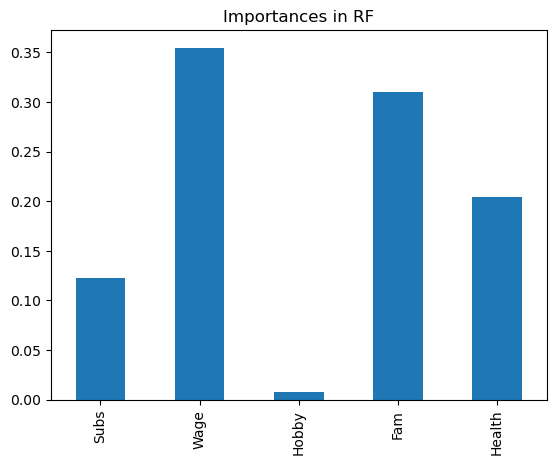

In [28]:
importances_rf = pd.Series(forest_class.feature_importances_, index = regressors_train.columns)
importances_rf.plot.bar()
plt.title('Importances in RF')
plt.show()

In [29]:
logreg = LogisticRegression()

logreg.fit(regressors_train, features_train['Music'])

LogisticRegression()

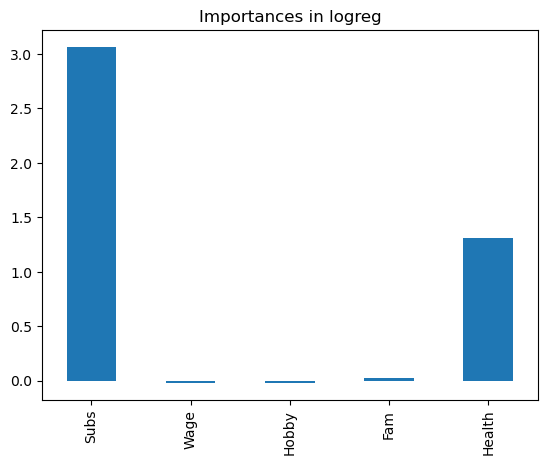

In [30]:
importances_lr = pd.Series(logreg.coef_[0], index = regressors_train.columns)
importances_lr.plot.bar()
plt.title('Importances in logreg')
plt.show()

In [31]:
boosting_class = GradientBoostingClassifier()

boosting_class.fit(regressors_train, features_train['Music'])

GradientBoostingClassifier()

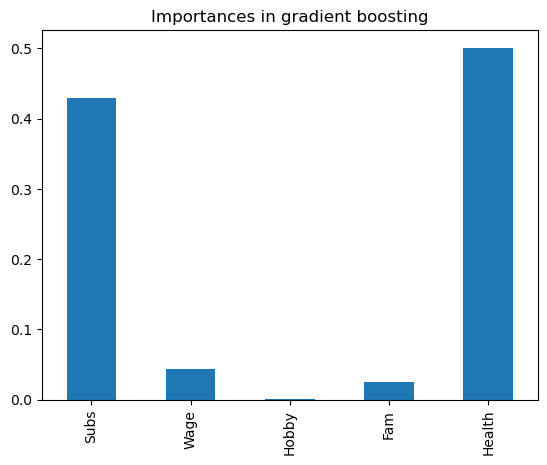

In [32]:
importances_gb = pd.Series(boosting_class.feature_importances_, index = regressors_train.columns)
importances_gb.plot.bar()
plt.title('Importances in gradient boosting')
plt.show()

Из графиков видно, что наиболее важными для прогнозирования являются `Subs` и `Health`, однако `Wage` и `Fam` тоже являются важными при обучении на Случайно лесе, поэтому выберем их для дальнейшего исследования.

In [33]:
selected = ['Subs', 'Wage', 'Fam', 'Health']
regressors_train = regressors_train[selected]
regressors_test = regressors_test[selected]

2. Выберите произвольные значения гиперпараметров, а затем оцените и сравните
(между методами) точность прогнозов:

• на обучающей выборке.

• на тестовой выборке.

• с помощью кросс-валидации (используйте только обучающую выборку).

Проинтерпретируйте полученные результаты

In [34]:
# Random Forest

forest = RandomForestClassifier(max_depth    = 12)

forest.fit(regressors_train, features_train['Music'])
rfs_tr = np.round(forest.score(regressors_train, features_train['Music']), 4)
rfs_te = np.round(forest.score(regressors_test, features_test['Music']), 4)
rfs_cv = np.round(np.mean(cross_val_score(forest, regressors_test, features_test['Music'], cv = 5)), 4)

In [35]:
# Logistic Regression

logit = LogisticRegression(solver = 'lbfgs', fit_intercept = True)
logit.fit(regressors_train, features_train['Music'])
lgt_tr = np.round(logit.score(regressors_train, features_train['Music']), 4)
lgt_te = np.round(logit.score(regressors_test, features_test['Music']), 4)
lgt_cv = np.round(np.mean(cross_val_score(logit, regressors_test, features_test['Music'], cv = 5)), 4)

In [36]:
# Gradient Boosting

gb = GradientBoostingClassifier()

gb.fit(regressors_train, features_train['Music'])
gb_tr = np.round(gb.score(regressors_train, features_train['Music']), 4)
gb_te = np.round(gb.score(regressors_test, features_test['Music']), 4)
gb_cv = np.round(np.mean(cross_val_score(gb, regressors_test, features_test['Music'], cv = 5)), 4)

In [37]:
# Сравним полученные результаты

pd.DataFrame(data  = [[rfs_tr, rfs_te, rfs_cv], [lgt_tr, lgt_te, lgt_cv], [gb_tr, gb_te, gb_cv]],
                   index   = ['Random Forest', 'Logistic Regression', 'Gradient Boosting'],
                   columns = ['Train', 'Test', 'Cross-validation (mean)'])

,Train,Test,Cross-validation (mean)
Random Forest,0.8846,0.8110,0.8090
Logistic Regression,0.8212,0.8190,0.8145
Gradient Boosting,0.8301,0.8145,0.8020


* На тестовой выборке и по средней точности на кросс-валидационной выборки лучшей является Логистическая регрессия
* Высокое значение точности Случайного леса на обучающей выборке и не такое высокое значение на тестовой может говорить о переобучении, хотя различие между ними не такое сильное.

3. Для каждого метода с помощью кросс-валидации на обучающей выборке подберите оптимальные значения гиперпараметров (тюнинг). В качестве критерия
качества используйте точность АСС. Результат представьте в форме таблицы, в которой для каждого метода должны быть указаны:
* изначальные и подобранные значения гиперпараметров.
* кросс-валидационная точность на обучающей выборке с исходными и подобранными значениями гиперпараметров.
* точность на тестовой выборке с исходными и подобранными значениями
гиперпараметров. \
Проинтерпретируйте полученные результаты и далее используйте методы с подобранными значениями гиперпараметров.

In [38]:
# Random Forest

# Перебираемые значения гиперпараметров
hyper = {'max_depth': range(1, 20)}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_rf = GridSearchCV(estimator  = RandomForestClassifier(),         # модель
                       param_grid = hyper,                            # перебираемые гиперпараметры
                       scoring    = "accuracy",                       # метрика качества модели
                       cv         = 5)                                # число фолдов в кросс-валидации
GSCV_rf.fit(regressors_train, features_train['Music'])

# Достанем гиперпараметры, соответствующие лучшей модели
rf_best = GSCV_rf.best_estimator_

rf_best_tr = np.round(rf_best.score(regressors_train, features_train['Music']), 4)
rf_best_te = np.round(rf_best.score(regressors_test, features_test['Music']), 4)
rf_best_cv = np.round(np.mean(cross_val_score(rf_best, regressors_test, features_test['Music'], cv = 5)), 4)

In [39]:
# Logistic Regression

# Перебираемые значения гиперпараметров
hyper = {'max_iter': [100, 300, 500, 700, 900, 1000]}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_lgt = GridSearchCV(estimator  = LogisticRegression(),             # модель
                       param_grid = hyper,                            # перебираемые гиперпараметры
                       scoring    = "accuracy",                       # метрика качества модели
                       cv         = 5)                                # число фолдов в кросс-валидации
GSCV_lgt.fit(regressors_train, features_train['Music'])

# Достанем гиперпараметры, соответствующие лучшей модели
lgt_best = GSCV_lgt.best_estimator_

lgt_best_tr = np.round(lgt_best.score(regressors_train, features_train['Music']), 4)
lgt_best_te = np.round(lgt_best.score(regressors_test, features_test['Music']), 4)
lgt_best_cv = np.round(np.mean(cross_val_score(lgt_best, regressors_test, features_test['Music'], cv = 5)), 4)

In [40]:
# Gradient Boosting

# Перебираемые значения гиперпараметров
hyper = {'n_estimators': [50, 100, 200, 300, 500],
         'learning_rate': [0.01, 0.05, 0.1, 0.2]}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_gb = GridSearchCV(estimator = GradientBoostingClassifier(),    # модель
                       param_grid = hyper,                            # перебираемые гиперпараметры
                       scoring    = "accuracy",                       # метрика качества модели
                       cv         = 5)                                # число фолдов в кросс-валидации
GSCV_gb.fit(regressors_train, features_train['Music'])

# Достанем гиперпараметры, соответствующие лучшей модели
gb_best = GSCV_gb.best_estimator_
gb_best_params = GSCV_gb.best_params_

gb_best_tr = np.round(gb_best.score(regressors_train, features_train['Music']), 4)
gb_best_te = np.round(gb_best.score(regressors_test, features_test['Music']), 4)
gb_best_cv = np.round(np.mean(cross_val_score(gb_best, regressors_test, features_test['Music'], cv = 5)), 4)

In [41]:
# Сравним полученные результаты

pd.DataFrame(data  = [[rfs_tr, rfs_te, rfs_cv, f'max_depth: {forest.get_params()["max_depth"]}'], [rf_best_tr, rf_best_te, rf_best_cv, f'max_depth: {rf_best.get_params()["max_depth"]}'], [lgt_tr, lgt_te, lgt_cv, f'max_iter: {logit.get_params()["max_iter"]}'], [lgt_best_tr, lgt_best_te, lgt_best_cv, f'max_iter: {lgt_best.get_params()["max_iter"]}'], [gb_tr, gb_te, gb_cv, f'n_estimators: {gb.get_params()["n_estimators"]};  learning_rate: {gb.get_params()["learning_rate"]}'], [gb_best_tr, gb_best_te, gb_best_cv, f'n_estimators: {gb_best.get_params()["n_estimators"]};  learning_rate: {gb_best.get_params()["learning_rate"]}']],
                   index   = ['Random Forest', 'Random Forest (tuned)', 'Logistic Regression', 'Logistic Regression (tuned)', 'Gradient Boosting', 'Gradient Boosting (tuned)'],
                   columns = ['Train', 'Test', 'Cross-validation (mean)', 'Hyperparameters'])

,Train,Test,Cross-validation (mean),Hyperparameters
Random Forest,0.8846,0.8110,0.8090,max_depth: 12
Random Forest (tuned),0.8384,0.8190,0.8160,max_depth: 6
Logistic Regression,0.8212,0.8190,0.8145,max_iter: 100
Logistic Regression (tuned),0.8212,0.8190,0.8145,max_iter: 100
Gradient Boosting,0.8301,0.8145,0.8020,n_estimators: 100; learning_rate: 0.1
Gradient Boosting (tuned),0.8210,0.8190,0.8070,n_estimators: 100; learning_rate: 0.01


* После тюнинга accuracy на тестовой выборке увеличилась у всех моделей, кроме Логистической регрессии - её гиперпараметры остались неизменны, что говорит об изначально верно подобранных гиперпараметрах.
* В Случайном лесе после тюнинга исчезло переобучение, то есть снизилась точность на обучающей выборке, при этом повысилась точность на тестовой и кросс-валидационных выборках.
* На кросс-валидационных выборках средняя точность упала у Случайного леса и Градиентного бустинга, несмотря на ворзосший показатель на тестовой выборке.

Повышенная сложность: подберите на обучающей выборке оптимальные
значения гиперпараметров случайного леса ориентируясь на значение OOB
(out-of-bag) ошибки. Сопоставьте гиперпараметры и точность на тестовой выборке для случайного леса в зависимости от того, используется кросс-валидация или OOB ошибка. Объясните преимущества и недостатки OOB ошибки по сравнению с кросс-валидацей.

In [42]:
# Random Forest

# Перебираемые значения гиперпараметров
hyper = {'max_depth': range(1, 20)}

oob_errors = []
# Перебор гиперпараметров с помощью oob-ошибки
for i in hyper['max_depth']:
  rf_oob = RandomForestClassifier(max_depth = i, oob_score=True, bootstrap=True, random_state = 42)
  rf_oob.fit(regressors_train, features_train['Music'])
  oob_error = 1 - rf_oob.oob_score_
  oob_errors.append(oob_error)
best_depth = hyper['max_depth'][oob_errors.index(min(oob_errors))]
rf_oob = RandomForestClassifier(max_depth = best_depth, oob_score=True, bootstrap=True)
rf_oob.fit(regressors_train, features_train['Music'])
rf_best_oob = np.round(rf_oob.score(regressors_test, features_test['Music']), 3)
rf_best_cv

pd.DataFrame(data  = [[rf_best_oob, best_depth], [rf_best_cv, rf_best.max_depth]],
                   index   = ['OOB', 'Cross-Validation'],
                   columns = ['Test Score', 'Max depth'])

# # Достанем гиперпараметры, соответствующие лучшей модели
# rf_best = GSCV_rf.best_estimator_

# rf_best_tr = np.round(rf_best.score(regressors_train, features_train['Music']), 3)
# rf_best_te = np.round(rf_best.score(regressors_test, features_test['Music']), 3)
# rf_best_cv = np.round(np.mean(cross_val_score(rf_best, regressors_test, features_test['Music'], cv = 5)), 3)

,Test Score,Max depth
OOB,0.818,8
Cross-Validation,0.816,6


Модель, выбранная по OOB ошибке, имеет другую максмальную глубину леса и показала выше точность на тестовой выборке.\
Преимущество состоит в том, что по OOB ошибке можно быстрее сравнить модели с разными гиперпараметрами, чем с помощью кросс-валидации. Однако OOB ошибку можно использовать только с ансамблевыми методами, из-за чего нельзя сравнить их результаты с неансамблевыми методами.

4. Повторите предыдущий пункт, используя любой альтернативный критерий качества модели. Обоснуйте возможные преимущества и недостатки этого альтернативного критерия.

In [43]:
# Random Forest

# Перебираемые значения гиперпараметров
hyper = {'max_depth': range(1, 20)}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_rf = GridSearchCV(estimator  = RandomForestClassifier(),         # модель
                       param_grid = hyper,                            # перебираемые гиперпараметры
                       scoring    = "f1",                             # метрика качества модели
                       cv         = 5)                                # число фолдов в кросс-валидации
GSCV_rf.fit(regressors_train, features_train['Music'])

# Достанем гиперпараметры, соответствующие лучшей модели
rf_f1 = GSCV_rf.best_estimator_

rf_f1_tr = np.round(rf_best.score(regressors_train, features_train['Music']), 4)
rf_f1_te = np.round(rf_best.score(regressors_test, features_test['Music']), 4)
rf_f1_cv = np.round(np.mean(cross_val_score(rf_best, regressors_test, features_test['Music'], cv = 5)), 4)

In [44]:
# Logistic Regression

# Перебираемые значения гиперпараметров
hyper = {'max_iter': [100, 300, 500, 700, 900, 1000]}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_lgt = GridSearchCV(estimator  = LogisticRegression(),             # модель
                       param_grid = hyper,                            # перебираемые гиперпараметры
                       scoring    = "f1",                       # метрика качества модели
                       cv         = 5)                                # число фолдов в кросс-валидации
GSCV_lgt.fit(regressors_train, features_train['Music'])

# Достанем гиперпараметры, соответствующие лучшей модели
lgt_f1 = GSCV_lgt.best_estimator_

lgt_f1_tr = np.round(lgt_best.score(regressors_train, features_train['Music']), 4)
lgt_f1_te = np.round(lgt_best.score(regressors_test, features_test['Music']), 4)
lgt_f1_cv = np.round(np.mean(cross_val_score(lgt_best, regressors_test, features_test['Music'], cv = 5)), 4)

In [45]:
# Gradient Boosting

# Перебираемые значения гиперпараметров
hyper = {'n_estimators': [50, 100, 200, 300, 500],
         'learning_rate': [0.01, 0.05, 0.1, 0.2]}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_gb = GridSearchCV(estimator = GradientBoostingClassifier(),    # модель
                       param_grid = hyper,                          # перебираемые гиперпараметры
                       scoring    = "f1",                           # метрика качества модели
                       cv         = 5)                              # число фолдов в кросс-валидации
GSCV_gb.fit(regressors_train, features_train['Music'])

# Достанем гиперпараметры, соответствующие лучшей модели
gb_f1 = GSCV_gb.best_estimator_

gb_f1_tr = np.round(gb_best.score(regressors_train, features_train['Music']), 4)
gb_f1_te = np.round(gb_best.score(regressors_test, features_test['Music']), 4)
gb_f1_cv = np.round(np.mean(cross_val_score(gb_best, regressors_test, features_test['Music'], cv = 5)), 4)

In [46]:
# Сравним полученные результаты

svod = pd.DataFrame(data  = [[rfs_tr, rfs_te, rfs_cv, f'max_depth: {forest.get_params()["max_depth"]}'], [rf_best_tr, rf_best_te, rf_best_cv, f'max_depth: {rf_best.get_params()["max_depth"]}'], [rf_f1_tr, rf_f1_te, rf_f1_cv, f'max_depth: {rf_f1.get_params()["max_depth"]}'], [lgt_tr, lgt_te, lgt_cv, f'max_iter: {logit.get_params()["max_iter"]}'], [lgt_best_tr, lgt_best_te, lgt_best_cv, f'max_iter: {lgt_best.get_params()["max_iter"]}'], [lgt_f1_tr, lgt_f1_te, lgt_f1_cv, f'max_iter: {lgt_f1.get_params()["max_iter"]}'], [gb_tr, gb_te, gb_cv, f'n_estimators: {gb.get_params()["n_estimators"]};  learning_rate: {gb.get_params()["learning_rate"]}'], [gb_best_tr, gb_best_te, gb_best_cv, f'n_estimators: {gb_best.get_params()["n_estimators"]};  learning_rate: {gb_best.get_params()["learning_rate"]}'], [gb_f1_tr, gb_f1_te, gb_f1_cv, f'n_estimators: {gb_f1.get_params()["n_estimators"]};  learning_rate: {gb_f1.get_params()["learning_rate"]}']],
                   index   = ['Random Forest', 'Random Forest (acc tune)', 'Random Forest (f1 tune)', 'Logistic Regression', 'Logistic Regression (acc tune)', 'Logistic Regression (f1 tune)', 'Gradient Boosting', 'Gradient Boosting (acc tune)', 'Gradient Boosting (f1 tune)'],
                   columns = ['Train', 'Test', 'Cross-validation (mean)', 'Hyperparameters'])
svod

,Train,Test,Cross-validation (mean),Hyperparameters
Random Forest,0.8846,0.8110,0.8090,max_depth: 12
Random Forest (acc tune),0.8384,0.8190,0.8160,max_depth: 6
Random Forest (f1 tune),0.8384,0.8190,0.8195,max_depth: 10
Logistic Regression,0.8212,0.8190,0.8145,max_iter: 100
Logistic Regression (acc tune),0.8212,0.8190,0.8145,max_iter: 100
Logistic Regression (f1 tune),0.8212,0.8190,0.8145,max_iter: 100
Gradient Boosting,0.8301,0.8145,0.8020,n_estimators: 100; learning_rate: 0.1
Gradient Boosting (acc tune),0.8210,0.8190,0.8070,n_estimators: 100; learning_rate: 0.01
Gradient Boosting (f1 tune),0.8210,0.8190,0.8070,n_estimators: 100; learning_rate: 0.01


* Случайный лес с подбором гиперпараметров по f1 показал точность на тестовой выборке выше, чем с изначальными гиперпараметрами, и равную с подбором по ACC. Однако меньшую на кросс-валидационных выборках, чем по ACC.
* У Логистической регрессии гиперпараметры остались те же, поэтому точность не менялась.
* Градиентный бустинг с подбором гиперпараметров по f1 показал точность  выше, чем с изначальными гиперпараметрами, и равную с подбором по ACC. Learning rate остался на том же уровне, что и при подборе по ACC.

В качестве альтерантивной метрики использовался f1-score. Преимущество данной метрики заключается в том, что учитывается и precision, и recall - это особенно полезно при несбалансированных классах, что и наблюдается в нашей выборке. \
Однако данную метрику может быть тяжело интерпретировать, и она одинаково штрафует и precision, и recall, что может быть недопустимо если одна или другая метрика важнее. Но в нашем случае это не так.

5. Постройте ROC-кривую для ваших моделей и сравните их по AUC на тестовой
выборке.

In [47]:
# Оценим вероятности на тестовой выборке
rf_prob1 = rf_best.predict_proba(regressors_test)[:, 1]
lgt_prob1 = lgt_best.predict_proba(regressors_test)[:, 1]
gb_prob1 = gb_best.predict_proba(regressors_test)[:, 1]

In [48]:
# Посчитеаем TPR и FPR при различных порога (thresholds)
rf_FPR, rf_TPR, rf_thresholds    = metrics.roc_curve(features_test['Music'], rf_prob1)
lgt_FPR, lgt_TPR, lgt_thresholds = metrics.roc_curve(features_test['Music'], lgt_prob1)
gb_FPR, gb_TPR, gb_thresholds       = metrics.roc_curve(features_test['Music'], gb_prob1)

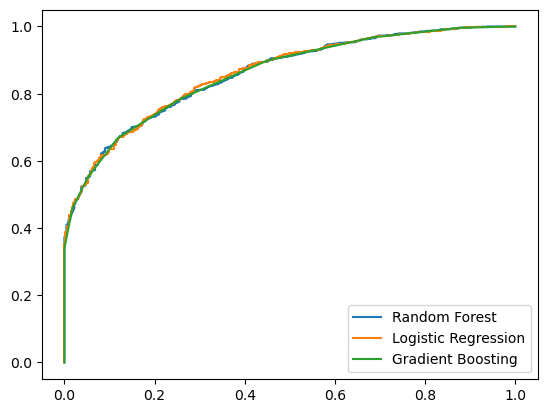

In [49]:
# Построим ROC-кривые сразу для трех моделей
plt.plot(rf_FPR, rf_TPR,  label = "Random Forest")
plt.plot(lgt_FPR, lgt_TPR, label = "Logistic Regression")
plt.plot(gb_FPR, gb_TPR,   label = "Gradient Boosting")
plt.legend()
plt.show()

In [50]:
# Сравним модели по AUC
rf_AUC = metrics.roc_auc_score(features_test['Music'], rf_prob1)
lgt_AUC = metrics.roc_auc_score(features_test['Music'], lgt_prob1)
gb_AUC = metrics.roc_auc_score(features_test['Music'], gb_prob1)
print(pd.DataFrame(data    = [rf_AUC, lgt_AUC, gb_AUC],
                   index   = ['Random Forest', 'Logistic Regression', 'Gradient Boosting'],
                   columns = ['AUC']))

                          AUC
Random Forest        0.859211
Logistic Regression  0.860706
Gradient Boosting    0.858514


* На графике видно, что ROC-кривые практически совпадают на большей части отрезков, однако также можно заметить, что иногда кривая Случайного леса идет ниже остальных. А кривая Логистической регрессии наоборот незначительно выше. Здесь стоит также заметить, что в нашей выборке достаточно сильный дисбаланс классов, из-за чего ROC-кривая может быть не так информативна.
* AUC выше у Логистической регрессии, но отклонение от значений других моделей не такое сильное - чуть больше от Случайного леса и чуть меньше от Градиентного бустинга, что соответствует положению кривых на графике.

6. Постройте матрицу ошибок и предположите цены различных видов прогнозов.
Исходя из критерия максимизации прибыли на обучающей выборке подбери-
те оптимальный порог прогнозирования для каждого из методов и сравните
прибыли на тестовой выборке при соответствующих порогах. Результат пред-
ставьте в форме таблицы, в которой должны быть указаны как AUC, так и
прибыли (на тестовой выборке). Проинтерпретируйте полученный результат.

Возможные виды прогнозов в нашей теме: \
TP (True postitve): $\quad Music_i = 1, \quad \hat{Music_i} = 1$ \
TN (True negative): $\quad Music_i = 0, \quad \hat{Music_i} = 0$ \
FP (False postitve): $\quad Music_i = 0, \quad \hat{Music_i} = 1$ \
FN (False negative): $\quad Music_i = 1, \quad \hat{Music_i} = 0$

In [51]:
# Спрогнозируем значения тестовой выборки

rf_pred_test = rf_best.predict(regressors_test)
lgt_pred_test = lgt_best.predict(regressors_test)
gb_pred_test = gb_best.predict(regressors_test)

In [52]:
df_pred = pd.DataFrame(data = [rf_pred_test, lgt_pred_test, gb_pred_test, features_test['Music']], index = ['RF_pred', 'Logit_pred', 'GB_pred', 'Real']).T
for i in range(df_pred.shape[0]):
  if df_pred.loc[i]['Real'] == 1 and df_pred.loc[i]['RF_pred'] == 1:
    df_pred.loc[i, 'RF Type'] = 'TP'
  elif df_pred.loc[i]['Real'] == 0 and df_pred.loc[i]['RF_pred'] == 0:
    df_pred.loc[i, 'RF Type'] = 'TN'
  elif df_pred.loc[i]['Real'] == 0 and df_pred.loc[i]['RF_pred'] == 1:
    df_pred.loc[i, 'RF Type'] = 'FP'
  elif df_pred.loc[i]['Real'] == 1 and df_pred.loc[i]['RF_pred'] == 0:
    df_pred.loc[i, 'RF Type'] = 'FN'

  if df_pred.loc[i]['Real'] == 1 and df_pred.loc[i]['Logit_pred'] == 1:
    df_pred.loc[i, 'Logit Type'] = 'TP'
  elif df_pred.loc[i]['Real'] == 0 and df_pred.loc[i]['Logit_pred'] == 0:
    df_pred.loc[i, 'Logit Type'] = 'TN'
  elif df_pred.loc[i]['Real'] == 0 and df_pred.loc[i]['Logit_pred'] == 1:
    df_pred.loc[i, 'Logit Type'] = 'FP'
  elif df_pred.loc[i]['Real'] == 1 and df_pred.loc[i]['Logit_pred'] == 0:
    df_pred.loc[i, 'Logit Type'] = 'FN'

  if df_pred.loc[i]['Real'] == 1 and df_pred.loc[i]['GB_pred'] == 1:
    df_pred.loc[i, 'GB Type'] = 'TP'
  elif df_pred.loc[i]['Real'] == 0 and df_pred.loc[i]['GB_pred'] == 0:
    df_pred.loc[i, 'GB Type'] = 'TN'
  elif df_pred.loc[i]['Real'] == 0 and df_pred.loc[i]['GB_pred'] == 1:
    df_pred.loc[i, 'GB Type'] = 'FP'
  elif df_pred.loc[i]['Real'] == 1 and df_pred.loc[i]['GB_pred'] == 0:
    df_pred.loc[i, 'GB Type'] = 'FN'

In [53]:
df_pred[['RF Type', 'Logit Type', 'GB Type']].apply(pd.value_counts)

,RF Type,Logit Type,GB Type
FN,118,157,50
FP,244,205,312
TN,212,251,144
TP,1426,1387,1494


In [54]:
# Матрица ошибок (одинаковая для всех моделей)
me = pd.DataFrame(data = [[df_pred['RF Type'].value_counts()['TP'], df_pred['RF Type'].value_counts()['FN']], [df_pred['RF Type'].value_counts()['FP'], df_pred['RF Type'].value_counts()['TN']]],
                  index = ['Real 1', 'Real 0'],
                  columns = ['Pred 1', 'Pred 0'])
me

,Pred 1,Pred 0
Real 1,1426,118
Real 0,244,212


Предположим, что работодатель считает, что его сотрудники будут работать эффективнее, если будут слушать музыку по пути на работу так как будут чувствовать себя счастливее, и решает раздать наушники тем, кто по его модели начнет это делать при появлении наушников.\
Предположим, что повышение эффективности 1 сотрудника принесет компании 100 рублей, а наушники стоят 50. Однако получение наушников работниками не гарантирует, что они начнут слушать музыку по пути на работу (и как следствие эффективно работать). \
В таком случае у каждого прогноза будут следующие цены:
* $P_{TP}=100-50=50$, прибыль с одного работника, так как он начнет работать эффективнее, но для этого ему нужно купить наушники
* $P_{TN}=0$, таким работникам работодатель совсем не покупает наушники.
* $P_{FP}=0-50=-50$, наушники куплены, а работник музыку слушать не начал, поэтому и эффективность не повысилась.
* $P_{FN}=-100=-100$, работодатель упустил возможность повысить эффективность сотрудника. это opportunity cost.

In [55]:
ptp = 50
ptn = 0
pfp = -50
pfn = -100
profit = ptp * df_pred['RF Type'].value_counts()['TP'] + ptn * df_pred['RF Type'].value_counts()['TN'] + pfp * df_pred['RF Type'].value_counts()['FP'] + pfn * df_pred['RF Type'].value_counts()['FN']
profit

47300

In [56]:
prices = pd.Series([50, 0, -50, -100], index = ["TP", "TN", "FP", "FN"])

In [57]:
# Подбор оптимального порога для максимизации прибыли

rf_prob1 = rf_best.predict_proba(regressors_train)[:, 1]
lgt_prob1 = lgt_best.predict_proba(regressors_train)[:, 1]
gb_prob1 = gb_best.predict_proba(regressors_train)[:, 1]

thr_rf = np.unique(np.sort(rf_prob1))
thr_lgt = np.unique(np.sort(lgt_prob1))
thr_gb = np.unique(np.sort(gb_prob1))

profits = dict()

# Random Forest
profits_rf = np.zeros(thr_rf.size)

TP_vec_rf = np.zeros(thr_rf.size)
TN_vec_rf = np.zeros(thr_rf.size)
FP_vec_rf = np.zeros(thr_rf.size)
FN_vec_rf = np.zeros(thr_rf.size)

# Рассчитаем прибыли для различных порогов
for i in range(0, thr_rf.size):
  # получаем прогнозы (на обучающей выборке) при соответствующем пороге
  prediction_i = (rf_prob1 >= thr_rf[i]).astype(int)
  # считаем количество прогнозов различного вида
  TN_vec_rf[i], FP_vec_rf[i], FN_vec_rf[i], TP_vec_rf[i] = confusion_matrix(
    features_train['Music'], prediction_i).ravel()
  # аггрегируем результаты прогнозов
  predictions_i = pd.Series([TP_vec_rf[i], TN_vec_rf[i], FP_vec_rf[i], FN_vec_rf[i]],
                                index = ["TP", "TN", "FP", "FN"])
  # считаем прибыль
  profits_rf[i] = np.sum(prices * predictions_i)
# Достанем оптимальный порог
threshold_rf = thr_rf[np.argmax(profits_rf)]
profits['Random Forest'] = np.round(threshold_rf, 3)

# Logit
profits_lgt = np.zeros(thr_lgt.size)

TP_vec_lgt = np.zeros(thr_lgt.size)
TN_vec_lgt = np.zeros(thr_lgt.size)
FP_vec_lgt = np.zeros(thr_lgt.size)
FN_vec_lgt = np.zeros(thr_lgt.size)

# Рассчитаем прибыли для различных порогов
for i in range(0, thr_lgt.size):
  # получаем прогнозы (на обучающей выборке) при соответствующем пороге
  prediction_i = (lgt_prob1 >= thr_lgt[i]).astype(int)
  # считаем количество прогнозов различного вида
  TN_vec_lgt[i], FP_vec_lgt[i], FN_vec_lgt[i], TP_vec_lgt[i] = confusion_matrix(
    features_train['Music'], prediction_i).ravel()
  # аггрегируем результаты прогнозов
  predictions_i = pd.Series([TP_vec_lgt[i], TN_vec_lgt[i], FP_vec_lgt[i], FN_vec_lgt[i]],
                                index = ["TP", "TN", "FP", "FN"])
  # считаем прибыль
  profits_lgt[i] = np.sum(prices * predictions_i)
# Достанем оптимальный порог
threshold_lgt = thr_lgt[np.argmax(profits_lgt)]
profits['Logit'] = np.round(threshold_lgt ,3)

# Gradient Boosting
profits_gb = np.zeros(thr_gb.size)

TP_vec_gb = np.zeros(thr_gb.size)
TN_vec_gb = np.zeros(thr_gb.size)
FP_vec_gb = np.zeros(thr_gb.size)
FN_vec_gb = np.zeros(thr_gb.size)

# Рассчитаем прибыли для различных порогов
for i in range(0, thr_gb.size):
  # получаем прогнозы (на обучающей выборке) при соответствующем пороге
  prediction_i = (gb_prob1 >= thr_gb[i]).astype(int)
  # считаем количество прогнозов различного вида
  TN_vec_gb[i], FP_vec_gb[i], FN_vec_gb[i], TP_vec_gb[i] = confusion_matrix(
    features_train['Music'], prediction_i).ravel()
  # аггрегируем результаты прогнозов
  predictions_i = pd.Series([TP_vec_gb[i], TN_vec_gb[i], FP_vec_gb[i], FN_vec_gb[i]],
                                index = ["TP", "TN", "FP", "FN"])
  # считаем прибыль
  profits_gb[i] = np.sum(prices * predictions_i)
# Достанем оптимальный порог
threshold_gb = thr_gb[np.argmax(profits_gb)]
profits['Gradient Boosting'] = np.round(threshold_gb, 3)

pd.DataFrame(profits, index = ['Threshold'])

,Random Forest,Logit,Gradient Boosting
Threshold,0.279,0.316,0.448


In [58]:
# Расчет прибыли и AUC

rf_prob_te = rf_best.predict_proba(regressors_test)[:, 1]
lgt_prob_te = lgt_best.predict_proba(regressors_test)[:, 1]
gb_prob_te = gb_best.predict_proba(regressors_test)[:, 1]

# Random Forest
test_pred = (rf_prob_te >= threshold_rf).astype(int)
TN_vec_rf, FP_vec_rf, FN_vec_rf, TP_vec_rf = confusion_matrix(features_test['Music'], test_pred).ravel()
predictions = pd.Series([TP_vec_rf, TN_vec_rf, FP_vec_rf, FN_vec_rf],
                              index = ["TP", "TN", "FP", "FN"])
profit_rf = np.sum(prices * predictions)

# Logit
test_pred = (lgt_prob_te >= threshold_lgt).astype(int)
TN_vec_lgt, FP_vec_lgt, FN_vec_lgt, TP_vec_lgt = confusion_matrix(features_test['Music'], test_pred).ravel()
predictions = pd.Series([TP_vec_lgt, TN_vec_lgt, FP_vec_lgt, FN_vec_lgt],
                              index = ["TP", "TN", "FP", "FN"])
profit_lgt = np.sum(prices * predictions)


# Gradient Boosting
test_pred = (gb_prob_te >= threshold_gb).astype(int)
TN_vec_gb, FP_vec_gb, FN_vec_gb, TP_vec_gb = confusion_matrix(features_test['Music'], test_pred).ravel()
predictions = pd.Series([TP_vec_gb, TN_vec_gb, FP_vec_gb, FN_vec_gb],
                              index = ["TP", "TN", "FP", "FN"])
profit_gb = np.sum(prices * predictions)

pd.DataFrame(data = [[profit_rf, rf_AUC], [profit_lgt, lgt_AUC], [profit_gb, gb_AUC]], index = ['Random Forest', 'Logit', 'Gradient Boosting'], columns = ['Profit', 'AUC'])

,Profit,AUC
Random Forest,55650,0.859211
Logit,55900,0.860706
Gradient Boosting,56300,0.858514


* Максимальное значение AUC можно наблюдать у Logit модели, однако прибыль максимальная у Градиентного бустинга. Это связано с тем, что максимизурются различные функции.
* Выбор модели зависит от задачи, однако стоит отметить, что при попытке оценки эффектов от решений в денежном выражении лучше использовать модель Градиентного бустинга.

7. Опишите предполагаемые связи между переменными в форме ориентированного ациклического графа (DAG). Обучите структуру Байесовской сети на обучающей выборке и сравните точность прогнозов вашего и обученного DAG на тестовой выборке.

In [59]:
all_data = pd.concat([regressors_train, regressors_test])

bins = np.histogram_bin_edges(all_data['Wage'], bins=6)
regressors_train['Wage_bin'] = pd.cut(regressors_train['Wage'], bins=bins, labels=False, include_lowest=True)
regressors_test['Wage_bin']  = pd.cut(regressors_test['Wage'],  bins=bins, labels=False, include_lowest=True)

bins = np.histogram_bin_edges(all_data['Health'], bins=6)
regressors_train['Health_bin'] = pd.cut(regressors_train['Health'], bins=bins, labels=False, include_lowest=True)
regressors_test['Health_bin']  = pd.cut(regressors_test['Health'],  bins=bins, labels=False, include_lowest=True)

bins = np.histogram_bin_edges(all_data['Fam'], bins=6)
regressors_train['Fam_bin'] = pd.cut(regressors_train['Fam'], bins=bins, labels=False, include_lowest=True)
regressors_test['Fam_bin']  = pd.cut(regressors_test['Fam'],  bins=bins, labels=False, include_lowest=True)

In [60]:
regressors_train

,Subs,Wage,Fam,Health,Wage_bin,Health_bin,Fam_bin
8490,-0.598141,-0.417905,1.377275,0.008538,2,3,4
9788,1.671845,-0.736489,-0.586865,1.393011,2,4,2
5967,-0.598141,0.432998,1.115389,-0.914445,3,1,3
7519,-0.598141,0.873235,-0.375342,-0.914445,3,1,2
8614,-0.598141,-0.628614,-1.755276,-0.914445,2,1,1
...,...,...,...,...,...,...,...
985,-0.598141,-0.409839,-1.674696,0.931520,2,4,1
5789,1.671845,-0.269367,-1.916436,1.854502,2,5,1
4017,1.671845,-1.156227,-0.476067,0.470029,1,3,2
7767,1.671845,0.943472,-0.526430,1.393011,3,4,2


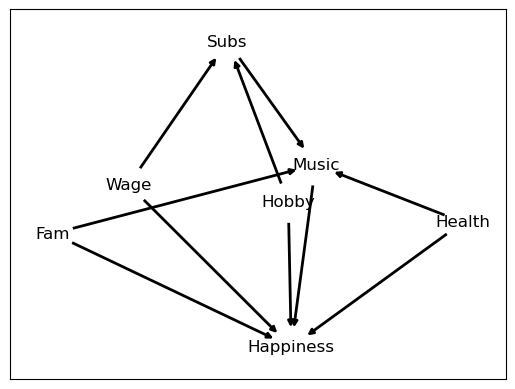

In [61]:
# Граф со всеми зависимостями

nx_options = {
    'node_color': 'white',
    'node_size': 800,
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 8,
}

edges = [("Health", "Happiness"),
         ("Wage", "Happiness"),
         ("Fam", "Happiness"),
         ("Hobby", "Happiness"),
         ("Music", "Happiness"),
         ("Fam", "Music"),
         ("Health", "Music"),
         ("Subs", "Music"),      # (откуда стрелочка, куда стрелочка)
         ("Wage", "Subs"),
         ("Hobby", "Subs")]

# Инициализируем граф
G = nx.DiGraph(directed = True)
G.add_edges_from(edges)

# Отображаем граф
np.random.seed(8)
nx.draw_networkx(G, arrows = True, **nx_options)

In [62]:
# nx_options = {
#     'node_color': 'white',
#     'node_size': 800,
#     'width': 2,
#     'arrowstyle': '-|>',
#     'arrowsize': 8,
# }
edges = [("Fam_bin", "Music"),
         ("Health_bin", "Music"),
         ("Subs", "Music"),      # (откуда стрелочка, куда стрелочка)
         ("Wage_bin", "Subs")]

# # Инициализируем граф
# G = nx.DiGraph(directed = True)
# G.add_edges_from(edges)

# # Отображаем граф
# np.random.seed(8)
# nx.draw_networkx(G, arrows = True, **nx_options)

dag = bnlearn.make_DAG(edges)
if 'config' not in dag:
    dag['config'] = {'method': 'bayes'}

dag_train = pd.concat([regressors_train, features_train['Music']], axis=1)
bn = bnlearn.parameter_learning.fit(dag, dag_train, methodtype = 'ml')

[bnlearn]> Auto generate placeholders for the CPTs.
[bnlearn] >CPT for Music:
+------------+---------------+-----+---------------+---------------+
| Fam_bin    | Fam_bin(0)    | ... | Fam_bin(1)    | Fam_bin(1)    |
+------------+---------------+-----+---------------+---------------+
| Health_bin | Health_bin(0) | ... | Health_bin(1) | Health_bin(1) |
+------------+---------------+-----+---------------+---------------+
| Subs       | Subs(0)       | ... | Subs(0)       | Subs(1)       |
+------------+---------------+-----+---------------+---------------+
| Music(0)   | 0.5           | ... | 0.5           | 0.5           |
+------------+---------------+-----+---------------+---------------+
| Music(1)   | 0.5           | ... | 0.5           | 0.5           |
+------------+---------------+-----+---------------+---------------+
[bnlearn] >CPT for Subs:
+----------+-------------+-------------+
| Wage_bin | Wage_bin(0) | Wage_bin(1) |
+----------+-------------+-------------+
| Subs(0)  | 0.

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


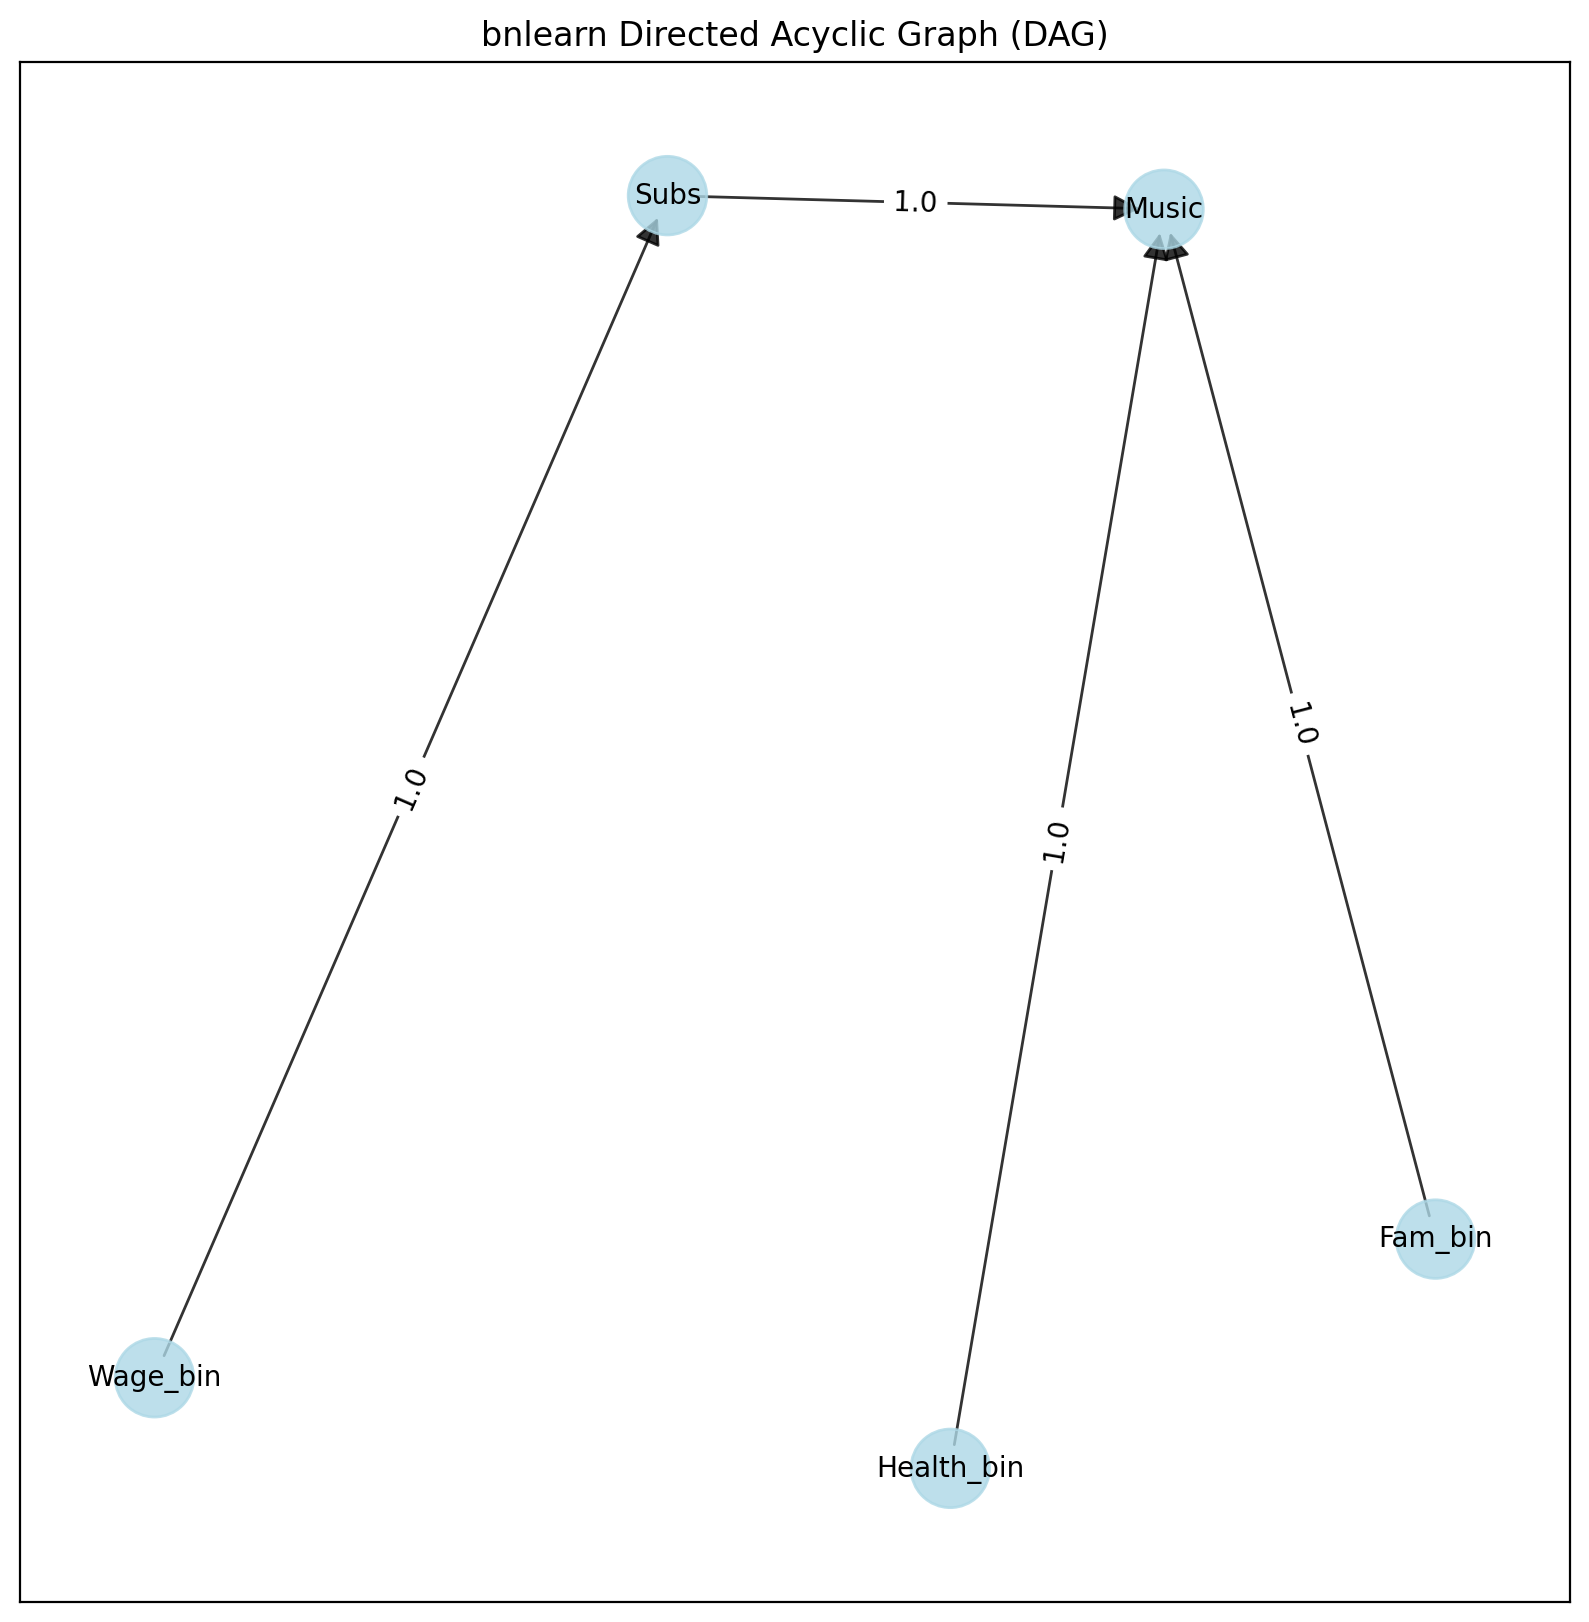

{'fig': <Figure size 2000x2000 with 1 Axes>,
 'ax': <Figure size 2000x2000 with 1 Axes>,
 'pos': {'Fam_bin': array([ 0.77952223, -0.2088507 ]),
  'Music': array([0.40238184, 0.42173251]),
  'Health_bin': array([ 0.10547638, -0.34921991]),
  'Subs': array([-0.28738045,  0.43007587]),
  'Wage_bin': array([-1.        , -0.29373777])},
 'G': <networkx.classes.digraph.DiGraph at 0x190e5c97dd0>,
 'node_properties': {'Fam_bin': {'node_color': '#ADD8E6', 'node_size': 800},
  'Music': {'node_color': '#ADD8E6', 'node_size': 800},
  'Health_bin': {'node_color': '#ADD8E6', 'node_size': 800},
  'Subs': {'node_color': '#ADD8E6', 'node_size': 800},
  'Wage_bin': {'node_color': '#ADD8E6', 'node_size': 800}},
 'edge_properties': {('Fam_bin', 'Music'): {'color': '#000000',
   'weight': 1.0,
   'pvalue': 1,
   'value': 1.0},
  ('Health_bin', 'Music'): {'color': '#000000',
   'weight': 1.0,
   'pvalue': 1,
   'value': 1.0},
  ('Subs', 'Music'): {'color': '#000000',
   'weight': 1.0,
   'pvalue': 1,
   'va

In [63]:
# Визуализируем DAG
bnlearn.plot(bn, interactive = False)

In [64]:
dag_test = pd.concat([regressors_test.drop(['Wage', 'Fam', 'Health'], axis = 1), features_test['Music']], axis=1)
predict_bn = bnlearn.predict(bn, df = dag_test, variables = ["Music"])
prediction_bn = predict_bn.loc[:, "Music"]
acc_bn = np.mean(features_test['Music'].reset_index(drop = True) == prediction_bn)
pd.DataFrame(data    = [rf_best_te, lgt_best_te, gb_best_te, acc_bn],
                   index   = ['Random forest', 'Logit', 'Gradient Bossting', 'Bayes'],
                   columns = ['ACC'])

[bnlearn]> Remaining columns for inference: 4


100%|██████████| 211/211 [00:00<00:00, 704.11it/s]


,ACC
Random forest,0.819
Logit,0.819
Gradient Bossting,0.819
Bayes,0.818


Как видно в таблице выше, Байесовская сеть дает более низкую точность, чем остальные модели, поэтому стоит использовать именно их.

In [65]:
from sklearn.metrics import roc_auc_score
auc_bn = roc_auc_score(features_test['Music'], predict_bn["p"])

8. На основании проделанного анализа выберите лучший и худший из обученных классификаторов. Обоснуйте сделанный выбор.

In [66]:
regressors_test = regressors_test.drop(['Wage_bin', 'Health_bin', 'Fam_bin'], axis = 1)
regressors_train = regressors_train.drop(['Wage_bin', 'Health_bin', 'Fam_bin'], axis = 1)

In [67]:
rfs_auc = metrics.roc_auc_score(features_test['Music'], forest.predict_proba(regressors_test)[:, 1])
lgt_auc = metrics.roc_auc_score(features_test['Music'], logit.predict_proba(regressors_test)[:, 1])
gb_auc = metrics.roc_auc_score(features_test['Music'], gb.predict_proba(regressors_test)[:, 1])
lgt_f1_auc = metrics.roc_auc_score(features_test['Music'], lgt_f1.predict_proba(regressors_test)[:, 1])
rf_f1_auc = metrics.roc_auc_score(features_test['Music'], rf_f1.predict_proba(regressors_test)[:, 1])
gb_f1_auc = metrics.roc_auc_score(features_test['Music'], gb_f1.predict_proba(regressors_test)[:, 1])

In [68]:
# Сравним полученные результаты

svod = pd.DataFrame(data  = [[rfs_tr, rfs_te, rfs_cv, rfs_auc, f'max_depth: {forest.get_params()["max_depth"]}'], [rf_best_tr, rf_best_te, rf_best_cv, rf_AUC, f'max_depth: {rf_best.get_params()["max_depth"]}'], [rf_f1_tr, rf_f1_te, rf_f1_cv, rf_f1_auc, f'max_depth: {rf_f1.get_params()["max_depth"]}'], [lgt_tr, lgt_te, lgt_cv, lgt_auc, f'max_iter: {logit.get_params()["max_iter"]}'], [lgt_best_tr, lgt_best_te, lgt_best_cv, lgt_AUC, f'max_iter: {lgt_best.get_params()["max_iter"]}'], [lgt_f1_tr, lgt_f1_te, lgt_f1_cv, lgt_f1_auc, f'max_iter: {lgt_f1.get_params()["max_iter"]}'], [gb_tr, gb_te, gb_cv, gb_auc, f'n_estimators: {gb.get_params()["n_estimators"]};  learning_rate: {gb.get_params()["learning_rate"]}'], [gb_best_tr, gb_best_te, gb_best_cv, gb_AUC, f'n_estimators: {gb_best.get_params()["n_estimators"]};  learning_rate: {gb_best.get_params()["learning_rate"]}'], [gb_f1_tr, gb_f1_te, gb_f1_cv, gb_f1_auc, f'n_estimators: {gb_f1.get_params()["n_estimators"]};  learning_rate: {gb_f1.get_params()["learning_rate"]}'], [None, acc_bn, None, auc_bn]],
                   index   = ['Random Forest', 'Random Forest (acc tune)', 'Random Forest (f1 tune)', 'Logistic Regression', 'Logistic Regression (acc tune)', 'Logistic Regression (f1 tune)', 'Gradient Boosting', 'Gradient Boosting (acc tune)', 'Gradient Boosting (f1 tune)', 'Bayasian Network'],
                   columns = ['Train', 'Test', 'Cross-validation (mean)', 'AUC', 'Hyperparameters'])
svod

,Train,Test,Cross-validation (mean),AUC,Hyperparameters
Random Forest,0.8846,0.8110,0.8090,0.845662,max_depth: 12
Random Forest (acc tune),0.8384,0.8190,0.8160,0.859211,max_depth: 6
Random Forest (f1 tune),0.8384,0.8190,0.8195,0.851866,max_depth: 10
Logistic Regression,0.8212,0.8190,0.8145,0.860706,max_iter: 100
Logistic Regression (acc tune),0.8212,0.8190,0.8145,0.860706,max_iter: 100
Logistic Regression (f1 tune),0.8212,0.8190,0.8145,0.860706,max_iter: 100
Gradient Boosting,0.8301,0.8145,0.8020,0.856995,n_estimators: 100; learning_rate: 0.1
Gradient Boosting (acc tune),0.8210,0.8190,0.8070,0.858514,n_estimators: 100; learning_rate: 0.01
Gradient Boosting (f1 tune),0.8210,0.8190,0.8070,0.858514,n_estimators: 100; learning_rate: 0.01
Bayasian Network,NaN,0.8180,NaN,0.782057,None


Так как у нас достаточно несбалансированные классы (Music = 1 составляет примерно 80% от всех наблюдений в тестовой выборке), то стоит использовать в качестве критерия AUC: он наиболее высокий у Логистической регрессии с параметрами, подобранными по точности, поэтому данная модель является лучшей. \
Моделью с наименьшим AUC является Случайный лес с изначальными параметрами, поэтому данная модель являются худшей (не считая байесовскую сеть).

In [69]:
features_train['Music'].value_counts()

Music
1    6155
0    1845
Name: count, dtype: int64

In [70]:
best = LogisticRegression(**lgt_best.get_params())
worst = RandomForestClassifier(**forest.get_params())

# 4 Регрессия

В каждом из заданий, если не сказано иного, необходимо использовать хотя бы 3
(на ваш выбор) из следующих методов: случайный лес, метод наименьших квадратов,
метод ближайших соседей и градиентный бустинг.

1. Отберите признаки, которые могут быть полезны при прогнозировании целевой
(зависимой) переменной. Не включайте в число этих признаков переменную
воздействия. Содержательно обоснуйте выбор признаков.


$\text{Wage}$ - чем выше заработная плата, тем больше материальных и нематериальных благ человек может себе позволить, тем самым удовлетворив свои потребности.

$\text{Fam}$ - времяпровождение с семьей помогает человеку справляться со стрессом, приносит положительные эмоции, семья служит поддержкой в трудных ситуациях.

$\text{Health}$ - приносит положительные эмоции, позволяет самореализоваться, чувствовать принадлежность к определенной социальной группе, а соответственно оказывает влияние на уровень счастья.

Однако мы проверим наши предположения по выбранным признакам на основе графиков важности. Построим их для Случайного леса и градиентного бустинга (для KNN не можем построить аналогичный график).

In [71]:
features = df.drop(columns='Happiness')
target = df['Happiness']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.2, random_state = 777)

In [72]:
# по заданию исключаем переменную воздействия
regressors_train = features_train.drop(columns=['Music'])
regressors_test = features_test.drop(columns=['Music'])
regressors_train.head()

,Subs,Wage,Hobby,Fam,Health
8490,0,87.10,0,49.7,5
9788,1,77.62,0,30.2,8
5967,0,112.42,1,47.1,3
7519,0,125.52,1,32.3,3
8614,0,80.83,0,18.6,3


In [73]:
# Сохраним данные до нормализации
regressors_train_initial = regressors_train.copy()
regressors_test_initial  = regressors_test.copy()

# Подготовим объект, осуществляющий нормализацию
scaler = sklearn.preprocessing.StandardScaler().set_output(transform = "pandas").fit(regressors_train)

# Нормализуем данные
regressors_train = scaler.transform(regressors_train_initial)  # обучающая выборка
regressors_test  = scaler.transform(regressors_test_initial)   # тестовая выборка
regressors_train.head(5)

,Subs,Wage,Hobby,Fam,Health
8490,-0.598141,-0.417905,-0.820969,1.377275,0.008538
9788,1.671845,-0.736489,-0.820969,-0.586865,1.393011
5967,-0.598141,0.432998,1.218073,1.115389,-0.914445
7519,-0.598141,0.873235,1.218073,-0.375342,-0.914445
8614,-0.598141,-0.628614,-0.820969,-1.755276,-0.914445


In [74]:
rf_reg = RandomForestRegressor()

rf_reg.fit(regressors_train, target_train)

RandomForestRegressor()

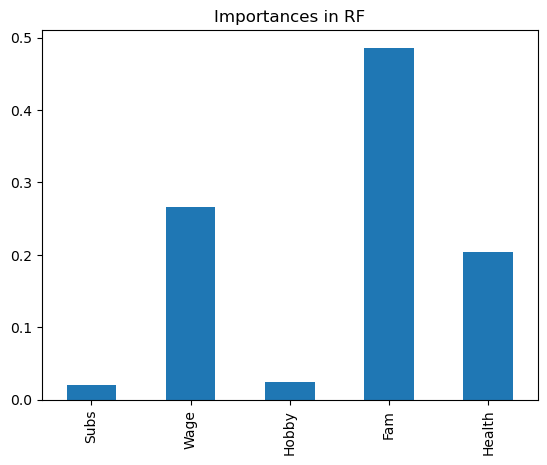

In [75]:
importances_rf = pd.Series(rf_reg.feature_importances_, index = regressors_train.columns)
importances_rf.plot.bar()
plt.title('Importances in RF')
plt.show()

In [76]:
boosting_reg = GradientBoostingRegressor()

boosting_reg.fit(regressors_train, target_train)

GradientBoostingRegressor()

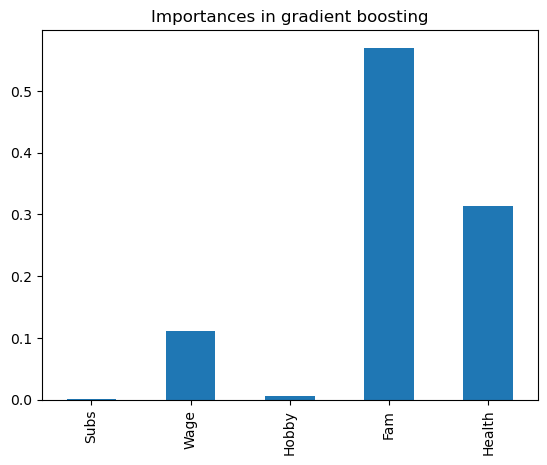

In [77]:
importances_gb = pd.Series(boosting_reg.feature_importances_, index = regressors_train.columns)
importances_gb.plot.bar()
plt.title('Importances in gradient boosting')
plt.show()

В резульатате, наше предположение насчет `Hobby` опроверглось, наибольший вклад в объяснение целевой переменной вносят `Wage`, `Fam` и `Health`. Будем использовать их для построения регрессии.

In [78]:
regressors_train = regressors_train.drop(columns = ['Subs', 'Hobby'])
regressors_test  = regressors_test.drop(columns = ['Subs', 'Hobby'])
regressors_train.head(5)

,Wage,Fam,Health
8490,-0.417905,1.377275,0.008538
9788,-0.736489,-0.586865,1.393011
5967,0.432998,1.115389,-0.914445
7519,0.873235,-0.375342,-0.914445
8614,-0.628614,-1.755276,-0.914445


2. Выберите произвольные значения гиперпараметров, а затем оцените и сравните (между методами) точность прогнозов с помощью RMSE и MAPE:
* на обучающей выборке.
* на тестовой выборке.
* с помощью кросс-валидации (используйте только обучающую выборку). \
Проинтерпретируйте полученные результаты.

### Случайный лес

In [79]:
rf = RandomForestRegressor(max_depth = 5,
                            max_features = "sqrt",
                            max_samples = 5,
                            random_state = 777,
                            criterion = 'squared_error')
rf.fit(regressors_train, target_train)

y_pred_train = rf.predict(regressors_train)
y_pred_test = rf.predict(regressors_test)

RMSE_rf_train = np.sqrt(mean_squared_error(target_train, y_pred_train))
RMSE_rf_test = np.sqrt(mean_squared_error(target_test, y_pred_test))
RMSE_rf_cross_val = np.mean(np.sqrt(-1 *cross_val_score(rf, regressors_train, target_train, cv=5, scoring='neg_mean_squared_error')))
MAPE_rf_train = mean_absolute_percentage_error(target_train, y_pred_train)
MAPE_rf_test = mean_absolute_percentage_error(target_test, y_pred_test)
MAPE_rf_cross_val = -1 * np.mean(cross_val_score(rf, regressors_train, target_train, cv=5, scoring='neg_mean_absolute_percentage_error'))

### Метод ближайших соседей

In [80]:
knn = KNeighborsRegressor(n_neighbors = 12,      # число соседей
                          metric = "minkowski", # метрика расстояния
                          p = 2)                # Евклидова метрика
knn.fit(regressors_train, target_train)

y_pred_train = knn.predict(regressors_train)
y_pred_test = knn.predict(regressors_test)

RMSE_knn_train = np.sqrt(mean_squared_error(target_train, y_pred_train))
RMSE_knn_test = np.sqrt(mean_squared_error(target_test, y_pred_test))
RMSE_knn_cross_val = np.mean(np.sqrt(-1 * cross_val_score(knn, regressors_train, target_train, cv=5, scoring='neg_mean_squared_error')))
MAPE_knn_train = mean_absolute_percentage_error(target_train, y_pred_train)
MAPE_knn_test = mean_absolute_percentage_error(target_test, y_pred_test)
MAPE_knn_cross_val = -1 * np.mean(cross_val_score(knn, regressors_train, target_train, cv=5, scoring='neg_mean_absolute_percentage_error'))

### Градиентный бустинг

In [81]:
gb = GradientBoostingRegressor(learning_rate =0.1, max_depth = 3, min_samples_split = 2, n_estimators = 50)

gb.fit(regressors_train, target_train)

y_pred_train = gb.predict(regressors_train)
y_pred_test = gb.predict(regressors_test)

RMSE_gb_train = np.sqrt(mean_squared_error(target_train, y_pred_train))
RMSE_gb_test = np.sqrt(mean_squared_error(target_test, y_pred_test))
RMSE_gb_cross_val = np.mean(np.sqrt(-1 * cross_val_score(gb, regressors_train, target_train, cv=5, scoring='neg_mean_squared_error')))
MAPE_gb_train = mean_absolute_percentage_error(target_train, y_pred_train)
MAPE_gb_test = mean_absolute_percentage_error(target_test, y_pred_test)
MAPE_gb_cross_val = -1 * np.mean(cross_val_score(rf, regressors_train, target_train, cv=5, scoring='neg_mean_absolute_percentage_error'))

In [82]:
data = {
    'Model': ['RandomForest', 'KNN', 'GB'],
    'MAPE_Train': [MAPE_rf_train, MAPE_knn_train, MAPE_gb_train],
    'RMSE_Train': [RMSE_rf_train, RMSE_knn_train, RMSE_gb_train],
    'MAPE_Test': [MAPE_rf_test, MAPE_knn_test, MAPE_gb_test],
    'RMSE_Test': [RMSE_rf_test, RMSE_knn_test, RMSE_gb_test],
    'MAPE_cros_val': [MAPE_rf_cross_val, MAPE_knn_cross_val, MAPE_gb_cross_val],
    'RMSE_cros_val': [RMSE_rf_cross_val, RMSE_knn_cross_val, RMSE_gb_cross_val]
}


comparison_df = pd.DataFrame(data)
comparison_df

,Model,MAPE_Train,RMSE_Train,MAPE_Test,RMSE_Test,MAPE_cros_val,RMSE_cros_val
0,RandomForest,0.141203,9.405649,0.146834,9.498062,0.141434,9.453107
1,KNN,0.105138,7.260933,0.117854,7.990486,0.114269,7.909870
2,GB,0.107249,7.421213,0.113731,7.699684,0.141434,7.640966


**Интерпретация**

Gradient Boosting демонстрирует наивысшую точность прогноза на тестовых данных по всем метрикам. Random Forest показывает худшие результаты, KNN имеет самый большой разрыв между train/test ошибками, модель немного переобучена, но мы подберем оптимальные значения параметров на этапе тюнинга.

3. Для каждого метода с помощью кросс-валидации на обучающей выборке подберите оптимальные значения гиперпараметров (тюнинг). В качестве критерия
качества используйте RMSE. Результат представьте в форме таблицы, в которой для каждого метода должны быть указаны:
* изначальные и подобранные значения гиперпараметров.
* кросс-валидационное значение RMSE на обучающей выборке с исходными
и подобранными значениями гиперпараметров.
* значение RMSE на тестовой выборке с исходными и подобранными значениями гиперпараметров.

Проинтерпретируйте полученные результаты

In [83]:
# Случайный лес
# Перебираемые значения гиперпараметров
hyperparameters = {'max_depth': [1, 3, 5, 7, 10, 12, 15, 20], 'n_estimators': [50, 100, 200, 300, 500]}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_rfr = GridSearchCV(estimator  = RandomForestRegressor(), # модель
                       param_grid = hyperparameters,   # перебираемые гиперпараметры
                       scoring    = "neg_mean_squared_error",     # метрика качества модели
                       cv         = 5)                 # число фолдов в кросс-валидации
GSCV_rfr.fit(regressors_train, target_train)              # подбор гиперпараметров
                                                       # на конкретных данных

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_best = GSCV_rfr.best_params_

# Посмотрим на оптимальную глубину дерева
print(hyperparameters_best)

{'max_depth': 7, 'n_estimators': 300}


In [84]:
rfr2 = RandomForestRegressor(max_depth = hyperparameters_best["max_depth"], n_estimators = hyperparameters_best["n_estimators"],
                            max_features = "sqrt",
                            max_samples = 5,
                            random_state = 777,
                            criterion = 'squared_error')
rfr2.fit(regressors_train, target_train)

y_pred_train_best = rfr2.predict(regressors_train)
y_pred_test_best = rfr2.predict(regressors_test)

RMSE_rf_train_best = np.sqrt(-GSCV_rfr.best_score_)
RMSE_rf_test_best = np.sqrt(mean_squared_error(target_test, y_pred_test_best))

In [85]:
# Метод ближайших соседей
# Перебираемые значения гиперпараметров
hyperparameters = {'n_neighbors': range(1, 100)}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_knn = GridSearchCV(estimator  = KNeighborsRegressor(), # модель
                       param_grid = hyperparameters,   # перебираемые гиперпараметры
                       scoring    = "neg_mean_squared_error",        # метрика качества модели
                       cv         = 5)                 # число фолдов в кросс-валидации
GSCV_knn.fit(regressors_train, target_train)              # подбор гиперпараметров
                                                       # на конкретных данных

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_best_knn = GSCV_knn.best_params_

# Посмотрим на оптимальную глубину дерева
print(hyperparameters_best_knn)

{'n_neighbors': 57}


In [86]:
knn2 = KNeighborsRegressor(n_neighbors = hyperparameters_best_knn['n_neighbors'],      # число соседей
                          metric = "minkowski", # метрика расстояния
                          p = 2)                # Евклидова метрика
knn2.fit(regressors_train, target_train)

y_pred_train_best = knn2.predict(regressors_train)
y_pred_test_best = knn2.predict(regressors_test)

RMSE_knn_train_best = np.sqrt(-GSCV_knn.best_score_)
RMSE_knn_test_best = np.sqrt(mean_squared_error(target_test, y_pred_test_best))

In [87]:
# Градиентный бустинг
# Перебираемые значения гиперпараметров
hyperparameters = {'n_estimators': [50, 100, 200, 300, 500], 'learning_rate': [0.01, 0.05, 0.1, 0.2],}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_gb = GridSearchCV(estimator  = GradientBoostingRegressor(), # модель
                       param_grid = hyperparameters,   # перебираемые гиперпараметры
                       scoring    = "neg_mean_squared_error",        # метрика качества модели
                       cv         = 5)                 # число фолдов в кросс-валидации
GSCV_gb.fit(regressors_train, target_train)              # подбор гиперпараметров
                                                       # на конкретных данных

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_best_gb = GSCV_gb.best_params_

# Посмотрим на оптимальную глубину дерева
print(hyperparameters_best_gb)

{'learning_rate': 0.05, 'n_estimators': 200}


In [88]:
gb2 = GradientBoostingRegressor(learning_rate = hyperparameters_best_gb['learning_rate'], max_depth = 3,
                                min_samples_split = 2,
                                n_estimators = hyperparameters_best_gb['n_estimators'])

gb2.fit(regressors_train, target_train)

y_pred_train_best = gb2.predict(regressors_train)
y_pred_test_best = gb2.predict(regressors_test)

RMSE_gb_train_best = np.sqrt(-GSCV_gb.best_score_)
RMSE_gb_test_best = np.sqrt(mean_squared_error(target_test, y_pred_test_best))

In [89]:
rf_max_depth= rf.get_params()['max_depth']
rf_n_estimators = rf.get_params()['n_estimators']
knn_default_params = knn.get_params()['n_neighbors']
gb_learning_rate = gb.get_params()['learning_rate']
gb_n_estimators = gb.get_params()['n_estimators']

In [90]:
data2 = {
    'Model': ['RF', 'KNN','GB'],
    'default_params': ['max_depth: ' + str(rf_max_depth) + ' n_estimators: ' + str(rf_n_estimators), 'n_neighbors: ' + str(knn_default_params),
                       'learning_rate: ' + str(gb_learning_rate) + ' n_estimators: ' + str(gb_n_estimators)],
    'best_params': [hyperparameters_best, hyperparameters_best_knn, hyperparameters_best_gb],
    'RMSE_CV_default': [RMSE_rf_cross_val, RMSE_knn_cross_val, RMSE_gb_cross_val],
    'RMSE_CV_best': [RMSE_rf_train_best, RMSE_knn_train_best, RMSE_gb_train_best],
    'RMSE_test_default': [RMSE_rf_test, RMSE_knn_test, RMSE_gb_test],
    'RMSE_test_best': [RMSE_rf_test_best, RMSE_knn_test_best, RMSE_gb_test_best]
}

metrics_df = pd.DataFrame(data2)
metrics_df

,Model,default_params,best_params,RMSE_CV_default,RMSE_CV_best,RMSE_test_default,RMSE_test_best
0,RF,max_depth: 5 n_estimators: 100,"{'max_depth': 7, 'n_estimators': 300}",9.453107,7.711088,9.498062,9.416884
1,KNN,n_neighbors: 12,{'n_neighbors': 57},7.909870,7.691371,7.990486,7.779742
2,GB,learning_rate: 0.1 n_estimators: 50,"{'learning_rate': 0.05, 'n_estimators': 200}",7.640966,7.625017,7.699684,7.676740


**Интерпретация**

* Оптимизированный Gradient Boosting показал наименьшую ошибку на тесте.
* KNN показал наибольший прогресс: хотя итоговый результат KNN чуть хуже GB, настройка его параметров дала самый значительный прирост качества.
* В нашем случае настройка RF не сработала: результаты RF подчеркивают, что улучшение на кросс-валидации не гарантирует улучшение на реальных новых данных к результатам оптимизации RF нужно относиться с осторожностью, так как на тренировочных данных модель работает хорошо и показывает высокие результаты, а на тестовых отрабатывает значительно хуже, вероятно из-за большого количества построенных деревьев ('n_estimators': 300).
* Сравнение моделей: без настройки лучшей на тесте была GB (RMSE = 7.699684). После настройки лучшим так и остался GB (RMSE = 7.676740).

Повышенная сложность: подберите на обучающей выборке оптимальные
значения гиперпараметров градиентного бустинга ориентируясь на значение
OOB (out-of-bag) ошибки. Сопоставьте гиперпараметры и точность на тестовой выборке для градиентного бустинга в зависимости от того, используется
кросс-валидация или OOB ошибка.

In [91]:
# Gradient Boosting

# Перебираемые значения гиперпараметров
hyper = {'n_estimators': [50, 100, 200, 300, 500], 'learning_rate': [0.01, 0.05, 0.1, 0.2]}
oob_errors = []
# Перебор гиперпараметров с помощью oob-ошибки
for i in hyper['n_estimators']:
    for j in hyper['learning_rate']:
        gb_oob = GradientBoostingRegressor(subsample = 0.9, n_estimators = i, learning_rate = j, max_depth = 3, random_state = 777)
        gb_oob.oob_score_ = True
        gb_oob.fit(regressors_train, target_train)
        oob_error = 1 - gb_oob.oob_score_
        oob_errors.append(oob_error)
best_est = hyper['n_estimators'][oob_errors.index(min(oob_errors))]
best_lr = hyper['learning_rate'][oob_errors.index(min(oob_errors))]
gb_oob = GradientBoostingRegressor(n_estimators = best_est, learning_rate = best_lr, max_depth = 3)
gb_oob.fit(regressors_train, target_train)
gb_best_oob = np.round(gb_oob.score(regressors_test, target_test), 3)
gb_best = GSCV_gb.best_estimator_
gb_best_cv = np.round(gb_best.score(regressors_test, target_test), 3)

pd.DataFrame(data  = [[gb_best_oob, best_est, best_lr], [gb_best_cv, gb_best.n_estimators, gb_best.learning_rate]],
                   index   = ['OOB', 'Cross-Validation'],
                   columns = ['Test Score', 'Estimator', 'Learning rate'])

,Test Score,Estimator,Learning rate
OOB,0.255,50,0.01
Cross-Validation,0.522,200,0.05


Модель, выбранная по OOB ошибке, имеет более низкую скорость обучения `learning_rate` и строит меньше деревьев `n_estimators`, она показала более низкую точность на тестовой выборке.\
Преимущество состоит в том, что по OOB ошибке можно быстрее сравнить модели с разными гиперпараметрами, чем с помощью кросс-валидации. Однако OOB ошибку можно использовать только с ансамблевыми методами, из-за чего нельзя сравнить их результаты с неансамблевыми методами.

4. На основании проделанного анализа выберите лучший и худший из обученных классификаторов. Обоснуйте сделанный выбор.
* **Gradient Boosting** - лучшая модель, так как после подбора гиперпараметров модель показала наилучшие результаты (n_estimators = 200, learning_rate = 0.05, RMSE = 7.64)
* **Random Forest** - худшая модель, так как даже после подбора гиперпараметров RMSE на тестовой выборке остался неизменным и самым большим среди всех представленных моделей, несмотря на значительные улчшения в кросс-валидационной выборке. (max_depth = 7, n_estimators = 100)

In [92]:
best_reg = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.05, random_state = 777)
worst_reg = RandomForestRegressor(max_depth = 7, n_estimators = 100)

5. Повышенная сложность: включите в анализ дополнительный метод регрессии, не рассматривавшийся в курсе и не представленный в библиотеке scikitlearn. Опишите данный метод (принцип работы, преимущества и недостатки)
и осуществите тюнинг гиперпараметров. Сопоставьте его точность на тестовой
выборке с точностью лучшего из обученных вами ранее методов.

**Метод регрессии:** квантильная регрессия

**Принцип работы:** Квантильная регрессия стремится оценить медиану (или другой квантиль) условного распределения зависимой переменной, вместо среднего значения. Это особенно полезно, когда распределение зависимой переменной сильно искажено или имеет тяжёлые хвосты.

**Преимущества:**
- Поскольку квантили менее чувствительны к выбросам по сравнению с средним, квантильная регрессия может предоставлять более робастные оценки.
- Гибкость модели
- Особенно ценна в эконометрике и финансах, где интерес к крайним значениям (например, риск высоких потерь) может быть важнее средних тенденций.

**Недостатки:**
- Методы оптимизации для квантильной регрессии могут быть более сложными и менее эффективными по сравнению с обычным МНК.
- Результаты могут быть сложнее для интерпретации, особенно при анализе нескольких квантилей.

In [93]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_train = regressors_train.merge(target_train, left_index=True, right_index=True)
df_test = regressors_test.merge(target_test, left_index=True, right_index=True)
# Моделируем квантильную регрессию для разных квантилей
quantiles = [0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75]

models = {}
results = {}


for quantile in quantiles:
    formula = 'Happiness ~ Wage + Fam + Health'
    model = smf.quantreg(formula, df_train).fit(q=quantile)
    pred = model.predict(df_train[['Wage', 'Fam', 'Health']])
    rmse = np.sqrt(mean_squared_error(df_train['Happiness'], pred))
    results[f'Quantile {quantile}'] = {
        'RMSE': rmse
    }

results

{'Quantile 0.25': {'RMSE': 9.066767039593609},
 'Quantile 0.3': {'RMSE': 8.61181582539237},
 'Quantile 0.4': {'RMSE': 7.958535222989658},
 'Quantile 0.5': {'RMSE': 7.643793535522222},
 'Quantile 0.6': {'RMSE': 7.787490616541135},
 'Quantile 0.7': {'RMSE': 8.468566017462244},
 'Quantile 0.75': {'RMSE': 9.038610800385275}}

In [94]:
quantile_best = smf.quantreg(formula, df_train).fit(q=0.5)
pred_test = quantile_best.predict(df_test[['Wage', 'Fam', 'Health']])
RMSE_best_q = np.sqrt(mean_squared_error(df_test['Happiness'], pred_test))

pd.DataFrame(data = [RMSE_best_q, RMSE_gb_test_best],
                   index = ['Квантильная регрессия', 'Лучшая модель'],
                   columns = ['RMSE_test'])

,RMSE_test
Квантильная регрессия,7.632062
Лучшая модель,7.676740


# Эффекты воздействия

1. Математически запишите и содержательно проинтерпретируйте потенциальные исходы целевой переменной. Объясните, как они связаны с наблюдаемыми значениями целевой переменной.

**Основная идея**
* Предположим, что счастье имеет положительную зависимость от здоровья, и при этом, когда человек уже очень здоров,  увеличение уровня здоровья на единицу влияет на уровень счастья меньше
* Уровень зарплаты и время, проведенное с семьей положительно влияют на уровень счастья

* $\text{Happiness}_{1i}$ - уровень счастья людей, которые слушают музыку по пути на работу $(\text{Music}_i = 1)$
* $\text{Happiness}_{0i}$ - уровень счастья людей, которые не слушают музыку по пути на работу $(\text{Music}_i = 0)$

Уравнение уровня счастья при отсутствии факта прослушивания музыки по пути на работу:

$$\text{Happiness}_{0i} = \underbrace{ \underbrace{7.8 * \sqrt{\text{Health}_i}}_{g_{0}^{\text{unobs}}} + \underbrace{\frac{\text{Wage}_i}{6 + 0.2 *\text{Fam}_i + 0.3 * \text{Hobby}_i}+ 0.7 * \text{Fam}_i + \text{Hobby}_i}_{g_{0}^{\text{obs}}}}_{g_0} + \varepsilon_{0i}, \quad \text{где } \varepsilon_{0i} \sim (\text{EXP}(1/5) - 5)$$


Уравнение уровня счастья при наличии факта прослушивания музыки по пути на работу:

$$\text{Happiness}_{1i} = \underbrace{ \underbrace{8.2 * \sqrt{\text{Health}_i}}_{g_{1}^{\text{unobs}}} + \underbrace{\frac{\text{Wage}_i}{4 + 0.3 *\text{Fam}_i + 0.4 * \text{Hobby}_i}+ 0.7 * \text{Fam}_i+\text{Hobby}_i}_{g_{1}^{\text{obs}}}}_{g_1} + \varepsilon_{1i}, \quad \text{где } \varepsilon_{1i} \sim \text{N}(0,7)$$

Наблюдаемый уровень счастья:

$$\text{Happiness}_{i} = \begin{cases}\text{Happiness}_{1i}\text{, если }\text{Music}_{i}=1\\ \text{Happiness}_{0i}\text{, если }\text{Music}_{i}=0\end{cases} = \\ =\text{Happiness}_{1i}\times\text{Music}_{i} + \text{Happiness}_{0i}\times\left(1-\text{Music}_{i}\right)$$

2. Используя симулированные вами, но недоступные в реальных данных потенциальные исходы (гипотетические значения), получите оценки среднего эффекта воздействия, условных средних эффектов воздействия и локального среднего эффекта воздействия. Для ATE и LATE результаты представьте в форме
таблицы, а для CATE постройте гистограмму или ядерную оценку функции плотности. Проинтерпретируйте полученные значения.

In [95]:
te = happiness1 - happiness0
print('Настоящие эффекты воздействия:', te[0:5])
ate = np.mean(te)
print('ATE:', np.round(ate, 3))

Настоящие эффекты воздействия: [  1.24088627 -12.03011269   9.31723377   1.05063494   3.04372382]
ATE: 0.191


In [96]:
compliers = music1 > music0
late = np.mean(te[compliers])
print('LATE:', np.round(late, 3))

LATE: 0.026


In [97]:
cate = g1 - g0
print(cate[0:10])

[ 0.32581816 -0.56385114 -0.34029935 -0.11617418  0.1459381   1.50858235
  0.1144266  -0.07062809  0.34725216 -0.48852377]


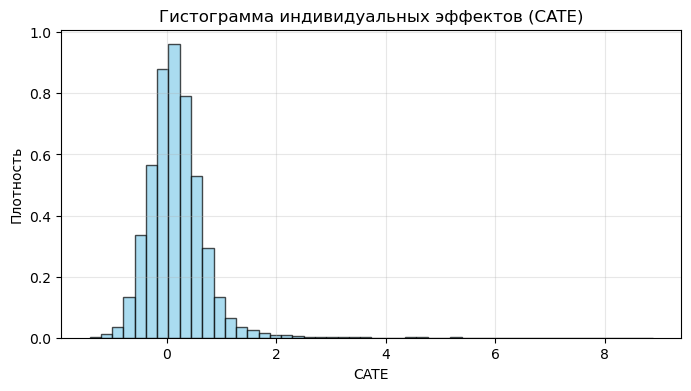

In [98]:
plt.figure(figsize=(8, 4))
plt.hist(cate, bins=50, color='skyblue', edgecolor='black', alpha=0.7, density=True, label='hist')
plt.title('Гистограмма индивидуальных эффектов (CATE)')
plt.xlabel('CATE')
plt.ylabel('Плотность')
plt.grid(alpha=0.3)
plt.show()

In [99]:
te_df = pd.DataFrame(data = [ate, late, np.mean(cate)], index = ['ATE', 'LATE', 'CATE (усред.)'], columns = ['Гипотетические данные'])
te_df

,Гипотетические данные
ATE,0.191002
LATE,0.025840
CATE (усред.),0.169977


3. Оцените средний эффект воздействия как разницу в средних по выборкам тех,
кто получил и не получил воздействие. Опишите недостатки соответствующего
подхода с учетом специфики рассматриваемой вами экономической проблемы.
Примечание: в этом пункте и далее, если не сказано иное, используются лишь
наблюдаемые значения целевой переменной.

In [100]:
ate_naive = np.mean(happiness[music == 1]) - np.mean(happiness[music == 0])
ate_naive

5.09243105390965

Можно заметить, что значение отличается от реального ATE примерно в 26 раз. Это ожидаемо, потому что наивный подход не учитывает влияение других переменных на целевую и подразумевает допущение о независимости, которое в данном случае нарушается. \
Переменные health и fam влияют как на прослушивание музыки по пути на работу, так и на уровень счастья. Например, когда человек болеет, ему реже хочется слушать музыку, потому что это доп нагрузка на голову, и при этом он менее счастлив из-за общего самочувствия.

4. Используя оценки, полученные лучшими из обученных ранее классификацион-
ных и регрессионных моделей, оцените средний эффект воздействия с помощью:
* метода наименьших квадратов.
* взвешивания на обратные вероятности (в случае возникновения ошибок убедитесь в отсутствии оценок вероятностей, равных 0 или 1 и при необходимости измените метод оценивания).
* метода, обладающего двойной устойчивостью.
* двойного машинного обучения. \
Сравните результаты и назовите ключевую предпосылку этих методов. Содер-
жательно обсудите причины, по которым она может соблюдаться или нару-
шаться в вашем случае. Приведите содержательную экономическую интерпре-
тацию оценки среднего эффекта воздействия.
Повышенная сложность: включите дополнительный метод, не рассматри-
вавшийся в курсе, и опишите его принцип работы, а также преимущества и
недостатки по сравнению с другими методами.

### МНК

$$\widehat{\text{ATE}}_{\text{LS}} = \frac{1}{n}\sum\limits_{i=1}^{n} \underbrace{\hat{\text{E}}\left(\text{Happiness}_{1i}|X_{i}\right) - \hat{\text{E}}\left(\text{Happiness}_{0i}|X_{i}\right)}_{\widehat{\text{CATE}}_{i}}$$

Где:


*   $\hat{\text{E}}\left(\text{Happiness}_{1i}|X_{i}\right)$ - оценка, полученная с использованием МНК оценок регрессионных коэффициентов $\beta$, полученных по выборке из индивидов, слушающих музыку по пути на работу $\text{Music}_{i} = 1$.
*   $\hat{\text{E}}\left(\text{Happiness}_{0i}|X_{i}\right)$ - оценка, полученная с использованием МНК оценок регрессионных коэффициентов $\beta$, полученных по выборке из индивидов, слушающих музыку по пути на работу $\text{Music}_{i} = 0$.

In [101]:
# МНК

# Оценим средний эффект воздействия с помощью МНК

# МНК оценивание уравнения зарплаты для
# индивидов, не слушающих музыку
y0  = df[df['Music'] == 0]['Happiness']
x0  = df[df['Music'] == 0].drop(['Music', 'Subs', 'Happiness'], axis = 1)
x0  = sm.add_constant(x0)
ls0 = sm.OLS(y0, x0).fit()

# МНК оценивание уравнения зарплаты для
# индивидов с высшим образованием
y1  = df[df['Music'] == 1]['Happiness']
x1  = df[df['Music'] == 1].drop(['Music', 'Subs', 'Happiness'], axis = 1)
x1  = sm.add_constant(x1)
ls1 = sm.OLS(y1, x1).fit()

# Оценим зарплаты при наличии и отсутствия высшего образования
# с помощью полученных МНК оценок
x = df.drop(['Music', 'Subs', 'Happiness'], axis = 1)
x = sm.add_constant(x)

# МНК оценка E(happy0 | X) для всех индивидов
happy0_ls = ls0.predict(x)
# МНК оценка E(happy1 | X) для всех индивидов
happy1_ls = ls1.predict(x)

# Оценки CATE
CATE_ls = np.array(happy1_ls - happy0_ls)

# Оценка ATE как средняя разница в прогнозах МНК оценок
ATE_ls = np.mean(CATE_ls)
np.round(ATE_ls, 3)

-0.169

### Условные матожидания

Используем T-learner:

$$\widehat{\text{ATE}}^{\text{T-learner}} = \frac{1}{n}\sum\limits_{i=1}^{n} \hat{\text{E}}\left(\text{Happiness}_{i}|X_{i},\text{Music}_{i}=1\right) - \hat{\text{E}}\left(\text{Happiness}_{i}|X_{i},\text{Music}_{i}=0\right)$$

Где:

*   $\hat{\text{E}}\left(\text{Happiness}_{i}|X_{i},\text{Music}_{i}=1\right)$ - оценка, полученная с использованием метода машинного обучения по выборке из индивидов, слушающих музыку по дороге на работу $\text{Music}_{i} = 1$.
*   $\hat{\text{E}}\left(\text{Happiness}_{i}|X_{i},\text{Music}_{i}=0\right)$ - оценка, полученная с использованием метода машинного обучения по выборке из индивидов, слушающих музыку по дороге на работу $\text{Music}_{i} = 0$.


In [102]:
# Оценивание ATE и CATE с помощью T-learner

rf = GradientBoostingRegressor(**best_reg.get_params())

# Обучение оценивать E(happiness | X, music = 0)
rf.fit(x0, y0)

# Оценки E(happiness | X, music = 0) для всех индивидов,
# в том числе для тех, у кого (music = 1).
happy0_rf = rf.predict(x)

# Обучение оценивать E(happiness | X, music = 1)
rf.fit(x1, y1)

# Оценки E(happiness | X, music = 1) для всех индивидов,
# в том числе для тех, у кого (music = 0).
happy1_rf = rf.predict(x)

# Оценки CATE
CATE_T = happy1_rf - happy0_rf

# Оценка ATE
ATE_T = np.mean(CATE_T)
ATE_T

0.49868175067914644

### Взвешивание на обратные вероятности

Оценка, получаемая с помощью взвешивания на обратные вероятности $\text{IPW}$, имеет вид:

$$\widehat{\text{ATE}}^{\text{IPW}} = \frac{1}{n}\sum\limits_{i=1}^{n}\frac{\text{Music}_{i}\times\text{Happiness}_{i}}{\hat{P}\left(\text{Music}_{i}=1|X_{i}\right)} - \frac{\left(1 - \text{Music}_{i}\right)\times\text{Happiness}_{i}}{1 - \hat{P}\left(\text{Music}_{i}=1|X_{i}\right)}$$

Где условные вероятности $\hat{P}\left(\text{Music}_{i}=1|X_{i}\right)$ оценивается с помощью методов классификации, например, градиентного бустинга или логистической регрессии.

In [103]:
df_c = sm.add_constant(df)

In [104]:
# Оценивание с помощью обратного взвешивания на вероятности IPW

# Подготовим данные
target   = df_c['Music']
features = df_c.drop(['Music', 'Subs'], axis = 1)

lgt = LogisticRegression(**best.get_params())

# Подготовим метод машинного обучения
lgt.fit(features, target) # изменил features на x

# Оценим условные вероятности P(music = 1 | X)
prob_gb = lgt.predict_proba(features)[:, 1]

# Оценим псевдоисходы
happiness_pseudo = (happiness * music) / prob_gb - (happiness * (1 - music)) / (1 - prob_gb)

# Оценим ATE
ATE_IPW = np.mean(happiness_pseudo)
ATE_IPW

-2.6672307678136233

### Метод двойной устойчивости

Методом с двойной устойчивостью средний эффект воздействия оценивается как:

$$\widehat{\text{ATE}}^{\text{DR}} = \frac{1}{n}\sum\limits_{i=1}^{n}\hat{\text{E}}\left(\text{Happiness}_{i}|X_{i}, T_{i}=1\right) - \hat{\text{E}}\left(\text{Happiness}_{i}|X_{i}, T_{i}=0\right) + \frac{\text{Music}_{i}\times\left(\text{Happiness}_{i}-\hat{\text{E}}\left(\text{Happiness}_{i}|X_{i}, T_{i}=1\right)\right)}{\hat{P}(\text{Music}_{i}=1|X_{i})} - \frac{\left(1-\text{Music}_{i}\right)\times\left(\text{Happiness}_{i}-\hat{\text{E}}\left(\text{Happiness}_{i}|X_{i}, T_{i}=0\right)\right)}{1 - \hat{P}(\text{Music}_{i}=1|X_{i})}$$

In [105]:
# Подготовим данные
y = df['Happiness']
x = df.drop(['Subs', 'Happiness'], axis = 1)

rf2 = GradientBoostingRegressor(**best_reg.get_params())
rf2.fit(x, y)

# Оценки E(happiness | X, music = 0) для всех индивидов,
# в том числе для тех, у кого (educ = 1).
x0          = deepcopy(x)
x0["Music"] = 0
happy0_rf2  = rf2.predict(x0)

# Оценки E(happiness | X, music = 1) для всех индивидов,
# в том числе для тех, у кого (educ = 0).
x1         = deepcopy(x)
x1["Music"] = 1
happy1_rf2  = rf2.predict(x1)

# Оценим ATE с помощью DR метода с двойной устойчивостью
ATE_DR = np.mean((happy1_rf2 - happy0_rf2) + \
                 music * (happiness - happy1_rf2) / prob_gb - \
                 (1 - music) * (happiness - happy0_rf2) / (1 - prob_gb))
ATE_DR

0.12815652017958631

### Метод двойного машинного обучения

In [106]:
# Данные в формате, необходимом для применения DML
dml_standard_data = dml.DoubleMLData(
                            data   = df_c,
                            y_col  = 'Happiness',
                            d_cols = 'Music',
                            x_cols = ['Wage', 'Hobby', 'Fam', 'Health']) # Добавил Health, но мб не надо

# Метод оценивания E(Y | X, T)
g_Y = GradientBoostingRegressor(**best_reg.get_params())

# Метод оценивания E(T | X)
g_T = LogisticRegression(**best.get_params())

# Подготовка объекта
dml_standard = dml.DoubleMLIRM(obj_dml_data = dml_standard_data,
                               ml_g         = g_Y,
                               ml_m         = g_T,
                               n_rep        = 1,
                               n_folds      = 5)

# Оценим параметры
dml_standard.fit()

# Сохраним оценку
ATE_dml_standard = dml_standard.coef[0]
ATE_dml_standard

0.2702310542252842

### Сравнение результатов

In [107]:
pd.DataFrame(data = [ate, ate_naive, ATE_ls, ATE_T, ATE_IPW, ATE_DR, ATE_dml_standard], index = ['Hypothetical', 'Naive', 'OLS', 'Условные матож', 'Обратные вероятности', 'Двойной устойчивости', 'Двойное МО'], columns = ['score'])

,score
Hypothetical,0.191002
Naive,5.092431
OLS,-0.169230
Условные матож,0.498682
Обратные вероятности,-2.667231
Двойной устойчивости,0.128157
Двойное МО,0.270231


Главная предпосылка для всех методов - условная независимость:
$$\text{E}(\text{Happiness}_{1i}|\text{Music}_{i}=1,X_{i}) = \text{E}(\text{Happiness}_{1i}|X_{i})\qquad \text{E}(\text{Happiness}_{0i}|\text{Music}_{i}=0,X_{i}) = \text{E}(\text{Happiness}_{0i}|X_{i})$$

Она не выполняется, так как присутствует ненаблюдаемая переменная $Health$, которая приводит к эндогенности.

Результаты рассмотренных методов значительно отличаются: Наивный метод, методы Обратных вероятностей и двойной устойчивости дают сильно завышенные оценки эффектов.
В то же время МНК и метод условных матожиданий сильно ближе к 0 и к гипотетическому ATE, результат метода ДМО также можно считать завышеным, но не так сильно.

Такое сильное различие между оценками ATE можно объяснить наличием эндогенности, то есть нарушается предпосылка об условной независимости.

Экономическая интерпретация (гипотетического) ATE: если все люди, которые не слушают музыку по пути на работу, начнут это делать, то средний уровень счастья увеличится на 0,197.

5. Оцените локальный условный эффект воздействия с помощью:
* двойного машинного обучения без инструментальной переменной.
* двойного машинного обучения с инструментальной переменной. \
\
Сопоставьте результаты и объясните, в чем в вашем случае будет заключаться различие между средним эффектом воздействия и локальным средним эффектом воздействия. Приведите содержательную экономическую интерпретацию оценки локального среднего эффекта воздействия.

In [108]:
# Данные в формате, необходимом для применения DML
dml_standard2_data = dml.DoubleMLData(
                            data   = df,
                            y_col  = 'Happiness',
                            d_cols = 'Music',
                            x_cols = ['Wage', 'Hobby', 'Fam'])

# Метод оценивания E(Y | X, T)
g_Y = GradientBoostingRegressor(**best_reg.get_params())

# Подготовка объекта
dml_standard2 = dml.DoubleMLIRM(obj_dml_data = dml_standard2_data,
                               ml_g         = g_Y,
                               ml_m         = g_T,
                               n_rep        = 1,
                               n_folds      = 5)

# Оценим параметры
dml_standard2.fit()

# Посмотрим на результат
print(dml_standard2)

# Сохраним оценку

LATE_dml_standard2 = dml_standard2.coef[0]

================== DoubleMLIRM Object ==================

------------------ Data summary      ------------------
Outcome variable: Happiness
Treatment variable(s): ['Music']
Covariates: ['Wage', 'Hobby', 'Fam']
Instrument variable(s): None
No. Observations: 10000

------------------ Score & algorithm ------------------
Score function: ATE

------------------ Machine learner   ------------------
Learner ml_g: GradientBoostingRegressor(learning_rate=0.05, n_estimators=200,
                          random_state=777)
Learner ml_m: LogisticRegression()
Out-of-sample Performance:
Regression:
Learner ml_g0 RMSE: [[7.45531564]]
Learner ml_g1 RMSE: [[9.15288123]]
Classification:
Learner ml_m Log Loss: [[0.53236764]]

------------------ Resampling        ------------------
No. folds: 5
No. repeated sample splits: 1

------------------ Fit summary       ------------------
           coef   std err          t          P>|t|     2.5 %   97.5 %
Music  4.450199  0.189769  23.450588  1.303780e-121  

In [109]:
# Данные в формате, необходимом для применения DML
dml_iv_data = dml.DoubleMLData(data   = df,
                               y_col  = 'Happiness',
                               d_cols = 'Music',
                               z_cols = 'Subs',
                               x_cols = ['Wage', 'Hobby', 'Fam', 'Health'])

# Подготовка объекта
dml_iv = dml.DoubleMLIIVM(obj_dml_data = dml_iv_data,
                                ml_g         = g_Y,
                                ml_m         = g_T,
                                ml_r         = g_T,
                                n_rep        = 1,
                                n_folds      = 2)

# Оценим параметры
dml_iv.fit()

# Посмотрим на результат
print(dml_iv)

# Сохраним оценку

LATE_dml_iv = dml_iv.coef[0]

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [110]:
# Сопоставим результаты
print(pd.DataFrame(data    = [ate, late, LATE_dml_standard2],
                   index   = ['ATE', 'LATE', 'LATE dml standard2'],
                   columns = ['Оценка']))

                      Оценка
ATE                 0.191002
LATE                0.025840
LATE dml standard2  4.450199


6. Оцените условные средние эффекты воздействия с помощью:
* метода наименьших квадратов.
* S-learner.
* T-learner.
* метода трансформации классов.
* X-learner. \
\
Сравните результаты и обсудите, насколько в вашем случае мотивированы применение метода X-learner. Опишите, как можно было бы использовать полученные вами оценки в бизнесе или при реализации государственных программ. \
**Повышенная сложность:** включите дополнительный метод, не рассматривавшийся в курсе и опишите его принцип работы, а также преимущества и недостатки по сравнению с другими методами.

In [111]:
# МНК

# Оценим средний эффект воздействия с помощью МНК

# МНК оценивание уравнения зарплаты для
# индивидов, не слушающих музыку
y0  = df[df['Music'] == 0]['Happiness']
x0  = df[df['Music'] == 0].drop(['Music', 'Subs', 'Happiness'], axis = 1)
x0  = sm.add_constant(x0)
ls0 = sm.OLS(y0, x0).fit()

# МНК оценивание уравнения зарплаты для
# индивидов с высшим образованием
y1  = df[df['Music'] == 1]['Happiness']
x1  = df[df['Music'] == 1].drop(['Music', 'Subs', 'Happiness'], axis = 1)
x1  = sm.add_constant(x1)
ls1 = sm.OLS(y1, x1).fit()

# Оценим зарплаты при наличии и отсутствия высшего образования
# с помощью полученных МНК оценок
x = df.drop(['Music', 'Subs', 'Happiness'], axis = 1)
x = sm.add_constant(x)

# МНК оценка E(happy0 | X) для всех индивидов
happy0_ls = ls0.predict(x)
# МНК оценка E(happy1 | X) для всех индивидов
happy1_ls = ls1.predict(x)

# Оценки CATE
CATE_ls = np.array(happy1_ls - happy0_ls)

In [112]:
# S-learner

# Подготовим данные
y = df['Happiness']
x_s = df.drop(['Subs', 'Happiness'], axis = 1)

# Подготовка единой модели
rf2 = GradientBoostingRegressor(**best_reg.get_params())
rf2.fit(x_s, y)

# Оценки E(happiness | X, music = 0) для всех индивидов,
# в том числе для тех, у кого (music = 1).
x0_s         = deepcopy(x_s)
x0_s["Music"] = 0
wage0_rf2  = rf2.predict(x0_s)

# Оценки E(happiness | X, music = 1) для всех индивидов,
# в том числе для тех, у кого (music = 0).
x1_s          = deepcopy(x_s)
x1_s["Music"] = 1
wage1_rf2  = rf2.predict(x1_s)

# Оценки CATE
CATE_S = wage1_rf2 - wage0_rf2

In [113]:
# Оценивание CATE с помощью T-learner

rf = GradientBoostingRegressor(**best_reg.get_params())

# Обучение оценивать E(happiness | X, music = 0)
rf.fit(x0, y0)

# Оценки E(happiness | X, music = 0) для всех индивидов,
# в том числе для тех, у кого (music = 1).
happy0_rf = rf.predict(x)

# Обучение оценивать E(happiness | X, music = 1)
rf.fit(x1, y1)

# Оценки E(happiness | X, music = 1) для всех индивидов,
# в том числе для тех, у кого (music = 0).
happy1_rf = rf.predict(x)

# Оценки CATE
CATE_T = happy1_rf - happy0_rf

Методом трансформации классов условные эффекты воздействия оцениваются как:
$$\widehat{\text{CATE}}_{i}^{\text{IPW}}=\hat{\text{E}}(\widehat{\text{Happiness}}_{i}^{*}|X_{i})$$

Где $\hat{\text{E}}(\widehat{\text{Hapiness}}_{i}^{*}|X_{i})$ это оценка условного математического ожидания оценки псевдоисхода, определяемой как:

$$\widehat{\text{Hapiness}}_{i}^{*} = \frac{\text{Music}_{i}\times\text{Hapiness}_{i}}{\hat{P}\left(\text{Music}_{i}=1|X_{i}\right)} - \frac{\left(1 - \text{Music}_{i}\right)\times\text{Hapiness}_{i}}{1 - \hat{P}\left(\text{Music}_{i}=1|X_{i}\right)}$$

In [114]:
# Оценим CATE методом трансформации классов

features = df.drop(['Music', 'Subs', 'Happiness'], axis = 1)
# Метод прогнозирования условных математических ожиданий оценок псевдоисходов
rf3 = GradientBoostingRegressor(**best_reg.get_params())
rf3.fit(features, happiness_pseudo)

# Оценки CATE (метод трансформации классов)
CATE_CT = rf3.predict(features)

In [115]:
!pip install econml

Defaulting to user installation because normal site-packages is not writeable


In [116]:
# X-learner
from econml.metalearners import XLearner

# Исходные данные
y = df['Happiness'].values
t = df['Music'].values
X = df[['Wage', 'Hobby', 'Fam']].values

# Базовые модели
outcome_model = GradientBoostingRegressor(**best_reg.get_params())
propensity_model = LogisticRegression(**best.get_params())

# Обучаем X-learner
xlearner = XLearner(models=outcome_model, propensity_model=propensity_model)
xlearner.fit(y, t, X=X)

# Оценка индивидуальных CATE (Conditional ATE) для всех наблюдений:
CATE_X = xlearner.effect(X)

In [117]:
pd.DataFrame(data    = {'CATE': cate,
                        'CATE ls': CATE_ls,
                        'CATE S': CATE_S,
                        'CATE T': CATE_T,
                        'CATE CT': CATE_CT,
                        'CATE X': CATE_X})

,CATE,CATE ls,CATE S,CATE T,CATE CT,CATE X
0,0.325818,-0.840899,0.120344,1.957279,-3.171114,4.626954
1,-0.563851,0.576022,0.021505,0.472331,-174.465890,6.210425
2,-0.340299,0.013987,0.000000,-2.600325,-8.985883,1.702039
3,-0.116174,-0.544900,0.034429,1.116525,0.529755,5.778824
4,0.145938,-2.534405,0.000000,3.351394,36.048326,2.422797
...,...,...,...,...,...,...
9995,0.117981,0.967424,0.055478,-1.201389,0.007859,3.937171
9996,0.597286,-0.738745,0.069842,1.287104,-30.756591,4.303562
9997,-0.522411,-0.746799,0.000000,2.594576,35.025325,4.953838
9998,0.663508,0.350628,0.293322,1.034979,8.328671,5.418762


X-learner был бы крайне полезен, если бы группа воздействия включала малое число наблюдений, что осложнило бы оценивание
$E(\text{Happiness}_i |X_i , \text{Music}_i = 1)$ по данным группы воздействия. \
В нашем случае в группе воздействия наоборот больше наблюдений, чем в контрольной, поэтому его применение не столь оправдано.

Знание CATE для каждого клиента или гражданина может помочь более эффективно тратить ресурсы: например, если оценка CATE для одного индивида показала, что эффект от прослушивания музыки по пути на работу будет незначительным, то этому сотруднику нет смысла покупать наушники - так бизнес может не тратить деньги на покупку, которая не принесет никакого эффекта.

7. Выберите лучшую модель оценивания условных средних эффектов воздействия, используя:
* истинные значения условных средних эффектов воздействия.
* прогнозную точность моделей.
* псевдоисходы.\
Проинтерпретируйте различия в результатах различных подходов.

С помощью истинных значений:

$$\text{MSE}_{0} = \frac{1}{n}\sum\limits_{i=1}^{n}\left(\text{CATE}_{i}-\widehat{\text{CATE}}_{i}\right)^2$$

In [118]:
# Сравнение оценок CATE на основании истинных значений
CATE_MSE0 = pd.DataFrame(data    = [np.mean((CATE_ls  - cate) ** 2),
                                    np.mean((CATE_S   - cate) ** 2),
                                    np.mean((CATE_T   - cate) ** 2),
                                    np.mean((CATE_CT  - cate) ** 2),
                                    np.mean((CATE_X   - cate) ** 2)],
                         index   = ['LS', 'S-learner', 'T-learner', 'CT', 'X-learner'],
                         columns = ['MSE0'])
CATE_MSE0

,MSE0
LS,1.293607
S-learner,0.171493
T-learner,3.767193
CT,2306.051472
X-learner,20.512756


С помощью прогнозной точности моделей:

$$MSE=\frac{1}{n}\sum_{i=1}^n(\text{Happiness}_i-\hat{E}(\text{Happiness}_i|X_i, \text{music}_i))^2$$

In [119]:
CATE_MSE1 = pd.DataFrame(data    = [np.mean((happiness - ls1.predict(x)) ** 2),
                                    np.mean((happiness - rf2.predict(x_s)) ** 2),
                                    np.mean((happiness - rf.predict(x)) ** 2),
                                    np.mean((happiness - rf3.predict(x.drop('const', axis = 1)) ** 2)),
                                    np.mean((happiness - xlearner.effect(x.drop(['const', 'Health'], axis = 1))) ** 2)],
                   index          = ['LS', 'S-learner', 'T-learner', 'CT', 'X-learner'],
                   columns        = ['MSE1'])
CATE_MSE1

,MSE1
LS,57.889020
S-learner,53.765103
T-learner,54.223722
CT,-2248.266577
X-learner,2941.219014


C помощью псевдоисходов:

$$\text{MSE}^{*} = \frac{1}{n}\sum\limits_{i=1}^{n}\left(\text{Happiness}_{i}^{*}-\widehat{\text{CATE}}_{i}\right)^2$$

In [120]:
# Сравнение CATE на основании псевдоисходов
CATE_MSE2 = pd.DataFrame(data    = [np.mean((happiness_pseudo - CATE_ls) ** 2),
                                    np.mean((happiness_pseudo - CATE_S) ** 2),
                                    np.mean((happiness_pseudo - CATE_T) ** 2),
                                    np.mean((happiness_pseudo - CATE_CT) ** 2),
                                    np.mean((happiness_pseudo - CATE_X) ** 2)],
                         index   = ['LS', 'S-learner', 'T-learner', 'CT', 'X-learner'],
                         columns = ['MSE2'])
CATE_MSE2

,MSE2
LS,52624.541666
S-learner,52630.273562
T-learner,52604.056006
CT,44397.233193
X-learner,52631.198821


8. Оцените средние эффекты воздействия и локальные средние эффекты воздействия используя худшие из обученных классификационных и регрессионных моделей. Сопоставьте результаты с теми, что были получены с помощью лучших моделей. Сдеайте вывод об устойчивости результатов к качеству используемых методов машинного обучения.

In [121]:
# Оценивание ATE и CATE с помощью T-learner (worst)

y0  = df[df['Music'] == 0]['Happiness']
x0  = df[df['Music'] == 0].drop(['Music', 'Subs', 'Happiness'], axis = 1)
x0  = sm.add_constant(x0)

y1  = df[df['Music'] == 1]['Happiness']
x1  = df[df['Music'] == 1].drop(['Music', 'Subs', 'Happiness'], axis = 1)
x1  = sm.add_constant(x1)

rf_w = RandomForestRegressor(**worst_reg.get_params())

# Обучение оценивать E(happiness | X, music = 0)
rf_w.fit(x0, y0)

x = df.drop(['Music', 'Subs', 'Happiness'], axis = 1)
x = sm.add_constant(x)

# Оценки E(happiness | X, music = 0) для всех индивидов,
# в том числе для тех, у кого (music = 1).
happy0_rf_w = rf_w.predict(x)

# Обучение оценивать E(happiness | X, music = 1)
rf_w.fit(x1, y1)

# Оценки E(happiness | X, music = 1) для всех индивидов,
# в том числе для тех, у кого (music = 0).
happy1_rf_w = rf_w.predict(x)

# Оценки CATE
CATE_T_w = happy1_rf_w - happy0_rf_w

# Оценка ATE
ATE_T_w = np.mean(CATE_T_w)
ATE_T_w

0.849237435328703

In [122]:
# Оценивание с помощью обратного взвешивания на вероятности IPW

# Подготовим данные
target   = df['Music']
features = df.drop(['Music', 'Subs'], axis = 1)

rf_w = RandomForestClassifier(**worst.get_params())

# Подготовим метод машинного обучения
rf_w.fit(features, target)

# Оценим условные вероятности P(music = 1 | X)
prob_rf_w = rf_w.predict_proba(features)[:, 1]

# Оценим псевдоисходы
happiness_pseudo_w = (happiness * music) / prob_rf_w - (happiness * (1 - music)) / (1 - prob_rf_w)

# Оценим ATE
ATE_IPW_w = np.mean(happiness_pseudo_w)
ATE_IPW_w

26.25459149016535

In [123]:
# Подготовим данные
y = df['Happiness']
x = df.drop(['Subs', 'Happiness'], axis = 1)

rf2_w = RandomForestRegressor(**worst_reg.get_params())
rf2_w.fit(x, y)

# Оценки E(happiness | X, music = 0) для всех индивидов,
# в том числе для тех, у кого (educ = 1).
x0          = deepcopy(x)
x0["Music"] = 0
happy0_rf2_w  = rf2_w.predict(x0)

# Оценки E(happiness | X, music = 1) для всех индивидов,
# в том числе для тех, у кого (educ = 0).
x1         = deepcopy(x)
x1["Music"] = 1
happy1_rf2_w  = rf2_w.predict(x1)

# Оценим ATE с помощью DR метода с двойной устойчивостью
ATE_DR_w = np.mean((happy1_rf2_w - happy0_rf2_w) + \
                 music * (happiness - happy1_rf2_w) / prob_rf_w - \
                 (1 - music) * (happiness - happy0_rf2_w) / (1 - prob_rf_w))
ATE_DR_w

0.026045756304672325

In [124]:
# Данные в формате, необходимом для применения DML
dml_standard_data = dml.DoubleMLData(
                            data   = df,
                            y_col  = 'Happiness',
                            d_cols = 'Music',
                            x_cols = ['Wage', 'Hobby', 'Fam', 'Health'])

# Метод оценивания E(Y | X, T)
g_Y_w = RandomForestRegressor(**worst_reg.get_params())

# Метод оценивания E(T | X)
g_T_w = RandomForestClassifier(**worst.get_params())

# Подготовка объекта
dml_standard_w = dml.DoubleMLIRM(obj_dml_data = dml_standard_data,
                               ml_g         = g_Y_w,
                               ml_m         = g_T_w,
                               n_rep        = 1,
                               n_folds      = 5)

# Оценим параметры
dml_standard_w.fit()

# Сохраним оценку
ATE_dml_standard_w = dml_standard_w.coef[0]
ATE_dml_standard_w

-0.01569220684365721

In [125]:
pd.DataFrame(data = [[ate, ate_naive, ATE_ls, ATE_T, ATE_IPW, ATE_DR, ATE_dml_standard], [None, None, None, ATE_T_w, ATE_IPW_w, ATE_DR_w, ATE_dml_standard_w]], columns = ['Hypothetical', 'Naive', 'OLS', 'Условные матож', 'Обратные вероятности', 'Двойной устойчивости', 'Двойное МО'], index = ['ATE best', 'ATE worst']).T

,ATE best,ATE worst
Hypothetical,0.191002,NaN
Naive,5.092431,NaN
OLS,-0.169230,NaN
Условные матож,0.498682,0.849237
Обратные вероятности,-2.667231,26.254591
Двойной устойчивости,0.128157,0.026046
Двойное МО,0.270231,-0.015692


In [126]:
# Данные в формате, необходимом для применения DML
dml_standard2_data = dml.DoubleMLData(
                            data   = df,
                            y_col  = 'Happiness',
                            d_cols = 'Music',
                            x_cols = ['Wage', 'Hobby', 'Fam', 'Health'])

# Метод оценивания E(Y | X, T)
g_Y_w = RandomForestRegressor(**worst_reg.get_params())

g_T_w = RandomForestClassifier(**worst.get_params())

# Подготовка объекта
dml_standard2_w = dml.DoubleMLIRM(obj_dml_data = dml_standard2_data,
                               ml_g         = g_Y_w,
                               ml_m         = g_T_w,
                               n_rep        = 1,
                               n_folds      = 5)

# Оценим параметры
dml_standard2_w.fit()

# Посмотрим на результат
print(dml_standard2_w)

# Сохраним оценку

LATE_dml_standard2_w = dml_standard2_w.coef[0]

================== DoubleMLIRM Object ==================

------------------ Data summary      ------------------
Outcome variable: Happiness
Treatment variable(s): ['Music']
Covariates: ['Wage', 'Hobby', 'Fam', 'Health']
Instrument variable(s): None
No. Observations: 10000

------------------ Score & algorithm ------------------
Score function: ATE

------------------ Machine learner   ------------------
Learner ml_g: RandomForestRegressor(max_depth=7)
Learner ml_m: RandomForestClassifier(max_depth=12)
Out-of-sample Performance:
Regression:
Learner ml_g0 RMSE: [[6.1503319]]
Learner ml_g1 RMSE: [[8.14443342]]
Classification:
Learner ml_m Log Loss: [[0.47592442]]

------------------ Resampling        ------------------
No. folds: 5
No. repeated sample splits: 1

------------------ Fit summary       ------------------
           coef   std err         t     P>|t|     2.5 %    97.5 %
Music  0.041158  0.297199  0.138485  0.889857 -0.541342  0.623658


In [127]:
pd.DataFrame(data = [late, LATE_dml_standard2, LATE_dml_standard2_w], index = ['LATE hyp', 'LATE (best)', 'LATE (worst)'], columns = ['DML']).T

,LATE hyp,LATE (best),LATE (worst)
DML,0.02584,4.450199,0.041158
